# Grupo 1

Guilherme Sousa - pg51188

Karyna Lysenko - pg51191 

Rodrigo Esperança- pg50923  

## Descrição do Dataset: 

Mutagenicidade significa a capacidade de uma droga de induzir alterações genéticas. Drogas que podem causar danos ao ADN podem resultar em morte celular ou outros efeitos adversos graves. Atualmente, o ensaio mais utilizado para testar a mutagenicidade de compostos é o ensaio de Ames, inventado por um professor chamado Ames. 

O teste de Ames é um ensaio de mutação reversa bacteriana de curto prazo que detecta um grande número de compostos que podem induzir danos genéticos e mutações de frameshift. Este teste envolve a exposição de bactérias ao produto químico que está sendo testado e a avaliação da taxa de mutações genéticas em comparação com um grupo de controlo que não foi exposto à substância. Se a taxa de mutações nas bactérias expostas for significativamente maior do que no grupo de controlo, isso sugere que o produto químico é mutagênico e pode representar um risco para a saúde humana.

O conjunto de dados é agregado de quatro artigos.


## Objetivo do trabalho: 

Tem como objetivo global a análise de um conjunto de dados de atividades de compostos químicos, caracterizados por um conjunto de variáveis (representam descritores químicos calculados para cada composto), bem como variáveis de metadados que representam alguma atividade ou propriedade das moléculas. Na parte final do trabalho, através das propriedades descritivas de uma droga, é desejado prever se a mesma terá uma capacidade mutagénica presente (Y=1) ou ausente (Y=0).

## Librarias e packages python

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.svm import LinearSVC
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Importar os dados e sua respetiva visualização

In [6]:
df_ames = pd.read_csv('ames.csv') #meta
print(df_ames)

            ids                                             smiles  Y
0        Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1
1        Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1
2        Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0
3        Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1
4        Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1
...         ...                                                ... ..
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0

[7273 rows x 3 columns]


In [7]:
df_features= pd.read_csv('ames_features.csv') #dados features
print(df_features)

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          11.663401       -0.396099          11.663401           0.008895   
1          11.824743       -0.170602          11.824743           0.170602   
2          14.431072       -0.378575          14.431072           0.128988   
3          10.422196       -0.670278          10.422196           0.248657   
4          10.521759       -0.752407          10.521759           0.278148   
...              ...             ...                ...                ...   
7268        8.502606        0.150556           8.502606           0.150556   
7269        2.303843        0.640191           2.303843           0.640191   
7270        5.671445       -1.672137           5.671445           0.713245   
7271       10.862176       -0.203597          10.862176           0.038935   
7272       12.621537       -0.362955          12.621537           0.362955   

           qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValence

# Merge dos dataframes

In [8]:
#juntar os dataframes para ser mais fácil trabalhar
df_global= pd.concat([df_ames, df_features], axis=1)
print(df_global)


            ids                                             smiles  Y  \
0        Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1   
1        Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1   
2        Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0   
3        Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1   
4        Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1   
...         ...                                                ... ..   
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0   
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0   
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0   
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0   
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0          11.663401       -0.396099         

# Análise sobre os dados e pré-processamento 

Os dados a serem tratados e analisados englobam um conjunto de drogas identificados com um ID único, cuja composição química é representada numa string SMILES, sendo que cada droga tem associado diversos parâmetros. Os parâmetros numéricos (exemplo: qed, MolWT, FpDensityMorgan1) descrevem as propriedades das respetivas drogas, que podem auxiliar numa determinada interpretação biológica. Existem também parâmetros binários (0 ou 1) que indicam a ausência ou presença de algo, respetivamente. Existe uma propriedade indicada com o nome "Y" que indica se uma determinada droga tem capacidade mutagénica ou não. Se uma determinada droga estiver associada a um Y de valor 1, significa que a mesma pode causar mutações no material genético, como o ADN. A presença de mutações pode levar a uma variedade de efeitos adversos, incluíndo o desenvolvimento de doenças genéticas, cancro e outras condições de saúde. Portanto, a capacidade de prever se um composto químico é mutagénico é importante para a segurança alimentar, a indústria farmacêutica e a ambiental.

In [9]:
#NAN- valores ausentes
tem_nulos = df_global.isnull().sum(axis=1) > 0
print(df_global[tem_nulos])
#demonstação visual, apenas falsos porque não existe valores nulos 
df_global.isnull()

#não existem valores NaN

Empty DataFrame
Columns: [ids, smiles, Y, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9

ids  smiles      Y  MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
0     False   False  False           False           False              False   
1     False   False  False           False           False              False   
2     False   False  False           False           False              False   
3     False   False  False           False           False              False   
4     False   False  False           False           False              False   
...     ...     ...    ...             ...             ...                ...   
7268  False   False  False           False           False              False   
7269  False   False  False           False           False              False   
7270  False   False  False           False           False              False   
7271  False   False  False           False           False              False   
7272  False   False  False           False           False              False   

      MinAbsEStateIndex    qed  MolWt  HeavyAtomMolWt  ...  fr_sulfide  \
0                 False  False  False           False  ...       False   
1                 False  False  False           False  ...       False   
2                 False  False  False           False  ...       False   
3                 False  False  False           False  ...       False   
4                 False  False  False           False  ...       False   
...                 ...    ...    ...             ...  ...         ...   
7268              False  False  False           False  ...       False   
7269              False  False  False           False  ...       False   
7270              False  False  False           False  ...       False   
7271              False  False  False           False  ...       False   
7272              False  False  False           False  ...       False   

      fr_sulfonamd  fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  \
0            False       False              False         False        False   
1            False       False              False         False        False   
2            False       False              False         False        False   
3            False       False              False         False        False   
4            False       False              False         False        False   
...            ...         ...                ...           ...          ...   
7268         False       False              False         False        False   
7269         False       False              False         False        False   
7270         False       False              False         False        False   
7271         False       False              False         False        False   
7272         False       False              False         False        False   

      fr_thiocyan  fr_thiophene  fr_unbrch_alkane  fr_urea  
0           False         False             False    False  
1           False         False             False    False  
2           False         False             False    False  
3           False         False             False    False  
4           False         False             False    False  
...           ...           ...               ...      ...  
7268        False         False             False    False  
7269        False         False             False    False  
7270        False         False             False    False  
7271        False         False             False    False  
7272        False         False             False    False  

[7273 rows x 211 columns]

In [10]:
#remoção valores duplicados
tem_duplicados = df_global.duplicated(subset='ids', keep=False)
print(df_global[tem_duplicados])
#não existem  ids duplicados

Empty DataFrame
Columns: [ids, smiles, Y, MaxEStateIndex, MinEStateIndex, MaxAbsEStateIndex, MinAbsEStateIndex, qed, MolWt, HeavyAtomMolWt, ExactMolWt, NumValenceElectrons, NumRadicalElectrons, MaxPartialCharge, MinPartialCharge, MaxAbsPartialCharge, MinAbsPartialCharge, FpDensityMorgan1, FpDensityMorgan2, FpDensityMorgan3, BCUT2D_MWHI, BCUT2D_MWLOW, BCUT2D_CHGHI, BCUT2D_CHGLO, BCUT2D_LOGPHI, BCUT2D_LOGPLOW, BCUT2D_MRHI, BCUT2D_MRLOW, BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3, LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9

In [11]:
#Dimensões
print(df_global.shape)

#7273 linhas que representam o numero de drogas analisadas.
#211 colunas que sao os parametros caracteristicos de cada uma destas drogas.

(7273, 211)


In [12]:
#forma de visualizar as primeiras 5 linhas no nosso dataframe, ou seja as primeiras 5 drogas e respetivos parametros.
print(df_global.head(5))

      ids                                             smiles  Y  \
0  Drug 0  O=[N+]([O-])c1ccc2ccc3ccc([N+](=O)[O-])c4c5ccc...  1   
1  Drug 1       O=[N+]([O-])c1c2c(c3ccc4cccc5ccc1c3c45)CCCC2  1   
2  Drug 2  O=c1c2ccccc2c(=O)c2c1ccc1c2[nH]c2c3c(=O)c4cccc...  0   
3  Drug 3                          [N-]=[N+]=CC(=O)NCC(=O)NN  1   
4  Drug 4                          [N-]=[N+]=C1C=NC(=O)NC1=O  1   

   MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       11.663401       -0.396099          11.663401           0.008895   
1       11.824743       -0.170602          11.824743           0.170602   
2       14.431072       -0.378575          14.431072           0.128988   
3       10.422196       -0.670278          10.422196           0.248657   
4       10.521759       -0.752407          10.521759           0.278148   

        qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
0  0.181963  342.310         332.230  ...         0.0           0.0   
1  0

In [13]:
#forma de visualizar as últimas 5 linhas no nosso dataframe, ou seja as últimas 5 drogas e respetivos parametros.
print(df_global.tail(5))

            ids                                             smiles  Y  \
7268  Drug 7587                                   CCCCCCCCCCCCOCCO  0   
7269  Drug 7588                             CC(CCc1ccccc1)c1ccccc1  0   
7270  Drug 7593                              CCOP(=S)(CC)Sc1ccccc1  0   
7271  Drug 7598                        C=C(C)C1CC=C(C)C(OC(C)=O)C1  0   
7272  Drug 7602  CC/N=c1\cc2oc3cc(NCC)c(C)cc3c(-c3ccccc3C(=O)OC...  0   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
7268        8.502606        0.150556           8.502606           0.150556   
7269        2.303843        0.640191           2.303843           0.640191   
7270        5.671445       -1.672137           5.671445           0.713245   
7271       10.862176       -0.203597          10.862176           0.038935   
7272       12.621537       -0.362955          12.621537           0.362955   

           qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
7268  0.485970  23

In [14]:
#ver types de dados de cada coluna
print(df_global.dtypes)

ids                  object
smiles               object
Y                     int64
MaxEStateIndex      float64
MinEStateIndex      float64
                     ...   
fr_thiazole         float64
fr_thiocyan         float64
fr_thiophene        float64
fr_unbrch_alkane    float64
fr_urea             float64
Length: 211, dtype: object


In [15]:
#nome de todas as colunas
print(df_global.columns.tolist())

['ids', 'smiles', 'Y', 'MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10

Através de uma simples análise dos dados do df_global é possivel verificar que não existem valores NaN, nem ids duplicados. O dataset possui 7273 linhas que correspondem às drogas analisadass e 211 colunas que retratam parâmetros característicos das mesmas e que, posteriormente, serão importantes para retirar conclusões que permitam associar cada uma destas colunas à capacidade mutagénica de determinada droga.

Salientar que de todas as colunas, aquela que terá maior preponderância na nossa análise e que será sempre tida em consideração é a coluna Y. Esta coluna é binária, onde o valor 0 indica que a droga não tem capacidade mutagénica e o valor 1 indica capacidade mutagénica.

Assim, decidimos ordenar o nosso df_global por ordem ascendente tendo como base a coluna em questão, sendo os primeiros valores associados a Y=0 e os últimos valores a um Y=1. Note-se que a segunda coluna referência de ordenação foi a coluna ids.

In [16]:
#ordenar primeiro pelos Y, ascending, e depois pelos ids
df_global = df_global.sort_values(by=['Y', 'ids'])
df_global
#df_global.head()
#df_global.tail()

ids                                             smiles  Y  \
10      Drug 10                                    Nc1nc(N)nc(N)n1  0   
999   Drug 1000                                               CCCC  0   
1003  Drug 1004                              Brc1ccc(-c2ccccc2)cc1  0   
1005  Drug 1006                               CN[C@@H](C)Cc1ccccc1  0   
1006  Drug 1007                            Cc1ccc([N+](=O)[O-])cc1  0   
...         ...                                                ... ..   
991    Drug 992                                  Cc1ccc([N+]#N)cc1  1   
993    Drug 994                            O=[N+]([O-])c1ccccc1CCl  1   
994    Drug 995  COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...  1   
997    Drug 998                                           O=C(O)CI  1   
998    Drug 999                    Oc1ccc2ccc3c4ccccc4cc4ccc1c2c43  1   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
10          5.137222        0.041667           5.137222           0.041667   
999         2.180556        1.319444           2.180556           1.319444   
1003        3.417985        1.117760           3.417985           1.117760   
1005        3.213398        0.567037           3.213398           0.567037   
1006       10.117782       -0.403333          10.117782           0.144074   
...              ...             ...                ...                ...   
991         8.253485        0.597778           8.253485           0.597778   
993        10.327561       -0.432824          10.327561           0.085648   
994        13.159159       -2.206177          13.159159           0.042079   
997         9.360556       -0.758704           9.360556           0.192222   
998        10.159286        0.351906          10.159286           0.351906   

           qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
10    0.394014  126.123         120.075  ...         0.0           0.0   
999   0.431024   58.124          48.044  ...         0.0           0.0   
1003  0.694585  233.108         224.036  ...         0.0           0.0   
1005  0.691109  149.237         134.117  ...         0.0           0.0   
1006  0.437912  137.138         130.082  ...         0.0           0.0   
...        ...      ...             ...  ...         ...           ...   
991   0.481977  119.147         112.091  ...         0.0           0.0   
993   0.389482  171.583         165.535  ...         0.0           0.0   
994   0.375739  414.366         396.222  ...         0.0           0.0   
997   0.477887  185.948         182.924  ...         0.0           0.0   
998   0.292579  268.315         256.219  ...         0.0           0.0   

      fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
10           0.0                0.0           0.0          0.0          0.0   
999          0.0                0.0           0.0          0.0          0.0   
1003         0.0                0.0           0.0          0.0          0.0   
1005         0.0                0.0           0.0          0.0          0.0   
1006         0.0                0.0           0.0          0.0          0.0   
...          ...                ...           ...          ...          ...   
991          0.0                0.0           0.0          0.0          0.0   
993          0.0                0.0           0.0          0.0          0.0   
994          0.0                0.0           0.0          0.0          0.0   
997          0.0                0.0           0.0          0.0          0.0   
998          0.0                0.0           0.0          0.0          0.0   

      fr_thiophene  fr_unbrch_alkane  fr_urea  
10             0.0               0.0      0.0  
999            0.0               0.0      0.0  
1003           0.0               0.0      0.0  
1005           0.0               0.0      0.0  
1006           0.0               0.0      0.0  
...            ...               ...      ...  
991            0.0      

In [17]:
#estrutura de uma molecula com capcidade mutagénica ausente
smiles = df_ames.loc[0,'smiles']
estrutura_y0= Chem.MolFromSmiles(smiles)
print(estrutura_y0)

In [18]:
#estrutura de uma molecula com capcidade mutagénica presente
smiles = df_ames.loc[1,'smiles']
estrutura_y1= Chem.MolFromSmiles(smiles)
print(estrutura_y1)


Apenas pela análise da estrutra molecular é bastante complicado prever se uma determinada droga tem capacidade mutagénica presente ou não, sendo por isso necessário auxiliar esta abordagem com a interpretação de mais colunas descritas ao longo do dataset.

# Sumarização e análise descritiva e estatística univariada dos dados

In [19]:
#info geral do nosso merge dataframe
df_global.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7273 entries, 10 to 998
Columns: 211 entries, ids to fr_urea
dtypes: float64(208), int64(1), object(2)
memory usage: 11.8+ MB


In [20]:
df_global.describe()

Y  MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  \
count  7273.000000     7273.000000     7273.000000        7273.000000   
mean      0.546405        9.362443       -0.451765           9.362443   
std       0.497876        3.029246        1.227820           3.029246   
min       0.000000        1.500000       -9.055860           1.500000   
25%       0.000000        6.209384       -0.846972           6.209384   
50%       1.000000       10.384028       -0.355799          10.384028   
75%       1.000000       11.488809        0.353001          11.488809   
max       1.000000       17.286264        4.111111          17.286264   

       MinAbsEStateIndex          qed        MolWt  HeavyAtomMolWt  \
count        7273.000000  7273.000000  7273.000000     7273.000000   
mean            0.349721     0.510130   242.568881      229.065451   
std             0.396510     0.167265   107.926752      102.707469   
min             0.000000     0.036666    41.053000       36.033000   
25%             0.075424     0.396894   165.148000      156.100000   
50%             0.211296     0.510491   230.270000      218.173000   
75%             0.510718     0.621552   296.319000      280.241000   
max             4.944445     0.935197   795.824000      766.923000   

        ExactMolWt  NumValenceElectrons  ...   fr_sulfide  fr_sulfonamd  \
count  7273.000000          7273.000000  ...  7273.000000   7273.000000   
mean    242.196954            88.108483  ...     0.026674      0.011275   
std     107.731070            39.772440  ...     0.176611      0.111911   
min      41.026550            14.000000  ...     0.000000      0.000000   
25%     165.039000            60.000000  ...     0.000000      0.000000   
50%     230.069140            84.000000  ...     0.000000      0.000000   
75%     296.060400           108.000000  ...     0.000000      0.000000   
max     795.175400           314.000000  ...     3.000000      2.000000   

        fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
count  7273.000000        7273.000000   7273.000000  7273.000000  7273.000000   
mean      0.003162           0.003025      0.000412     0.012237     0.000550   
std       0.058548           0.054919      0.020307     0.114844     0.028719   
min       0.000000           0.000000      0.000000     0.000000     0.000000   
25%       0.000000           0.000000      0.000000     0.000000     0.000000   
50%       0.000000           0.000000      0.000000     0.000000     0.000000   
75%       0.000000           0.000000      0.000000     0.000000     0.000000   
max       2.000000           1.000000      1.000000     2.000000     2.000000   

       fr_thiophene  fr_unbrch_alkane      fr_urea  
count    7273.00000       7273.000000  7273.000000  
mean        0.00825          0.270727     0.017874  
std         0.09345          1.539449     0.138591  
min         0.00000          0.000000     0.000000  
25%         0.00000          0.000000     0.000000  
50%         0.00000          0.000000     0.000000  
75%         0.00000          0.000000     0.000000  
max         2.00000         29.000000     2.000000  

[8 rows x 209 columns]

In [21]:
df_global.apply(lambda x: str(x.min())+"---"+str (x.max()))

ids                                  Drug 0---Drug 999
smiles              Br/C=C/Br---c1scc2c1-c1cscc1C1OC21
Y                                                0---1
MaxEStateIndex                         1.5---17.286264
MinEStateIndex                     -9.05586---4.111111
                                   ...                
fr_thiazole                                  0.0---2.0
fr_thiocyan                                  0.0---2.0
fr_thiophene                                 0.0---2.0
fr_unbrch_alkane                            0.0---29.0
fr_urea                                      0.0---2.0
Length: 211, dtype: object

Os dados descritivos obtidos como a média, mediana, desvio padrão, entre outros, podem ser extremamente úteis na interpretação dos dados, podendo levar a conclusões biológicas interessantes. Todavia, esta análise descritiva para todas as colunas é bastante extensa tornando bastante complicado saber filtrar toda esta informação.

Assim, a estratégia empregue foi, tendo por base sempre a coluna Y, tentar relacionar as restantes colunas. Sabendo que analisar todas as colunas é um processo muito extenso, focamo-nos apenas nas colunas que segundo a literatura nos iriam permitir  retirar as melhores associações e conclusões nesta primeira fase.

Em primeiro lugar, verificamos a distribuição da coluna Y, ou seja, percebemos que das 7273 drogas analisadas quantas estavam ou não associadas a uma capacidade mutagénica. Desta forma, criamos 2 gráficos, um gráfico circular que nos permite ver esta distribuição em percentagem e um histograma que nos permite ter uma maior noção em termos de frequência.

1    3974
0    3299
Name: Y, dtype: int64


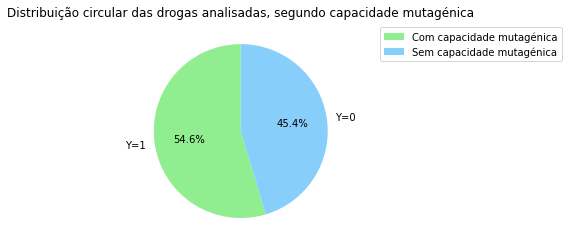

In [22]:
#gráfico circular para analisar a distribuição entre y 0 ou 1
frequence = df_global['Y'].value_counts()
print(frequence)
labels = ['Y=1', 'Y=0']
colors = ['lightgreen', 'lightskyblue']
plt.pie(frequence, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribuição circular das drogas analisadas, segundo capacidade mutagénica')
plt.legend(["Com capacidade mutagénica","Sem capacidade mutagénica"],bbox_to_anchor=(2, 1), loc='upper right', ncol=1)
plt.show()


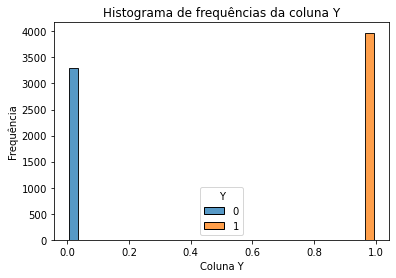

In [23]:
sns.histplot(data=df_global, x='Y', hue='Y', multiple='dodge', shrink=.8)
plt.xlabel('Coluna Y')
plt.ylabel('Frequência')
plt.title('Histograma de frequências da coluna Y')
plt.show()

Como era expectável, ambos os gráficos permitem retirar a mesma conclusão, o df_global tem mais drogas associadas a uma capacidade mutagénica. Todavia, a diferença não é assim tão elevada o que é adequeado para estudos que serão realizados posteriormente.

Dando uma vista de olhos mais geral pelo df_global foi possível verificar que existem diversos "grupos" de colunas com o nome bastante semelhante. Face a isso, o que fizemos foi pesquisar na literatura uma possível relevância entre o que é avaliado em cada uma dessas colunas e a capacidade mutagénica de um composto.

O que pretendiamos nesta etapa era, de certa forma, filtrar um pouco os dados, uma vez que, ainda tinhamos 211 colunas. Então a estratégia foi em primeiro lugar normalizar os dados associdados a colunas comuns, ou seja os dados associados a cada "grupo" de colunas escolhido e a partir daí escolher as colunas que tinham as médias mais elevadas e mais baixas, tendo sempre em paralelo a coluna Y (Y=1 e Y=0).

Realçar que nesta primeira fase optamos por não normalizar todo o nosso dataset, uma vez que a maior parte da análise nesta fase é univariada. Assim, apenas recorremos à normalização quando estamos a comparar mais do que uma coluna ao mesmo tempo, mas quando estamos a trabalhar com algum "grupo" de colunas. 

O primeiro "grupo" a ser analisado foi o "fr_" que representa a fração molar de compostos em cada molécula. Segundo a literatura, algumas moléculas químicas podem estar associadas à capacidade mutagênica de uma molécula. Por exemplo, certos grupos funcionais (como os grupos nitro) ou estruturas aromáticas (como anéis benzênicos) podem aumentar a capacidade mutagênica de uma molécula. Portanto, a presença de certas subestruturas químicas na coluna "fr_" pode ser um indicador de que uma molécula tem maior ou menor potencial para ser mutagénica [1].

In [24]:
df_final=df_global
#para ter certeza que temos um dataset "puro" para utilizar no ML

In [25]:
# Selecionar  as colunas que começam com "fr_" com auxilio da regex
cols_fr = df_global.filter(regex='^fr_').columns

# Aplicando a normalização apenas nessas colunas, achamos necesário
scaler = StandardScaler()
df_global[cols_fr] = scaler.fit_transform(df_global[cols_fr])
df_global[cols_fr] 


fr_Al_COO  fr_Al_OH  fr_Al_OH_noTert    fr_ArN  fr_Ar_COO   fr_Ar_N  \
10    -0.231277 -0.353990        -0.338216  6.813532  -0.147601  3.208969   
999   -0.231277 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   
1003  -0.231277 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   
1005  -0.231277 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   
1006  -0.231277 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   
...         ...       ...              ...       ...        ...       ...   
991   -0.231277 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   
993   -0.231277 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   
994   -0.231277  3.359327         2.296862 -0.307777  -0.147601 -0.425986   
997    2.906933 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   
998   -0.231277 -0.353990        -0.338216 -0.307777  -0.147601 -0.425986   

      fr_Ar_NH  fr_Ar_OH    fr_COO   fr_COO2  ...  fr_sulfide  fr_sulfonamd  \
10   -0.191858 -0.305681 -0.276524 -0.277019  ...   -0.151043     -0.100753   
999  -0.191858 -0.305681 -0.276524 -0.277019  ...   -0.151043     -0.100753   
1003 -0.191858 -0.305681 -0.276524 -0.277019  ...   -0.151043     -0.100753   
1005 -0.191858 -0.305681 -0.276524 -0.277019  ...   -0.151043     -0.100753   
1006 -0.191858 -0.305681 -0.276524 -0.277019  ...   -0.151043     -0.100753   
...        ...       ...       ...       ...  ...         ...           ...   
991  -0.191858 -0.305681 -0.276524 -0.277019  ...   -0.151043     -0.100753   
993  -0.191858 -0.305681 -0.276524 -0.277019  ...   -0.151043     -0.100753   
994  -0.191858  3.291759 -0.276524 -0.277019  ...   -0.151043     -0.100753   
997  -0.191858 -0.305681  2.560091  2.552696  ...   -0.151043     -0.100753   
998  -0.191858  1.493039 -0.276524 -0.277019  ...   -0.151043     -0.100753   

      fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
10     -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
999    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
1003   -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
1005   -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
1006   -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
...          ...                ...           ...          ...          ...   
991    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
993    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
994    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
997    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
998    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   

      fr_thiophene  fr_unbrch_alkane   fr_urea  
10       -0.088286         -0.175872 -0.128981  
999      -0.088286         -0.175872 -0.128981  
1003     -0.088286         -0.175872 -0.128981  
1005     -0.088286         -0.175872 -0.128981  
1006     -0.088286         -0.175872 -0.128981  
...            ...               ...       ...  
991      -0.088286         -0.175872 -0.128981  
993      -0.088286         -0.175872 -0.128981  
994      -0.088286         -0.175872 -0.128981  
997      -0.088286         -0.175872 -0.128981  
998      -0.088286         -0.175872 -0.128981  

[7273 rows x 85 columns]

In [26]:
# Filtrar linhas com Y=0 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^fr_')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: fr_COO2
Coluna com menor média: fr_benzene


In [27]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "fr"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^fr_')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")


Coluna com maior média: fr_benzene
Coluna com menor média: fr_COO2


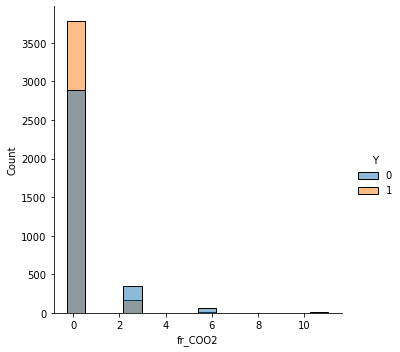

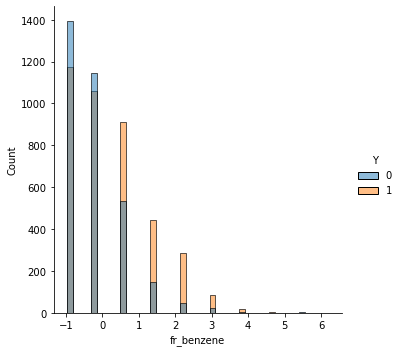

In [28]:
# Filtrar os dados por y=1 e y=0
df_y1 = df_global[df_global['Y']==1]
df_y0 = df_global[df_global['Y']==0]

# Criar o displot para fr_C002 em relação a Y
sns.displot(data=df_global, x='fr_COO2', hue='Y', kde=False)

# Criar o displot para fr_benzene em relação a Y
sns.displot(data=df_global, x='fr_benzene', hue='Y', kde=False)



O resultado obtido vai de encontro ao que era esperado no sentido em que : a maior média associada a uma capacidade mutagénica presente (Y=1) teria de ser a menor média quando se estivesse a observar a coluna Y=0 e vice-versa. Sendo assim, as duas colunas que achamos mais relevantes estudar no grupo "fr_" são fr_benzene (associada a Y=1) e fr_COO2 (associada a Y=0).

Além disso, os resultados obtidos vão de acordo ao descrito na literatura, onde o benzeno é conhecido por ser um composto químico altamente cancerígeno e mutagénico. A exposição prolongada ao benzeno pode causar danos no DNA e aumentar o risco de desenvolver cancro [2]. Portanto, o fr_benzene pode estar relacionado à capacidade mutagénica dos compostos no dataset ames. É importante ressaltar, no entanto, que a análise da relação entre fr_benzene e capacidade mutagênica poderia ser mais extensamente explorada considerando outros fatores, como a dosagem e a frequência de exposição ao benzeno. Relativamente ao COO2, um ester carboxílico, na literatura não foram encontrdas evidências científicas que indiquem que compostos com COO2, por si só, esteja, diretamente relacionado com a capacidade mutagénica tal como verificado pelos resultados.

Relativamente aos gráficos criados, a barra cinza indica a densidade de frequência que é compartilhada pelas duas categorias de Y (Y=0 e Y=1) para o "fr_" em questão. A parte colorida do gráfico indica a distribuição de fr_COO2 ou fr_benzene para cada categoria de Y. Lembrando que os valores foram previamente normalizados, a forma mais direta de interpretar estes gráfico é, por exemplo, no gráfico fr_COO2 podemos ver que todos os valores associados a Y=1 estão com fr_COO2 de 0, ou seja este tipo de molécula não está ligado à capacidade mutagénica. No gráfico do fr_benzene vemos que a maior parte dos valores >0 estão associados a Y=1.

É sabido que podem haver mais composto com elevadas médias tal como o benzeno (relativamente à coluna Y=1) e que também poderiam ter sidos considerados, contudo para permitir filtrar um pouco a nossa análise apenas temos em consideração o fr_benzene e fr_COO2.

O segundo "grupo" a ser analisado foi o "SMR_VSA", que se refere às contribuições do descritor VSA (Volume-based Surface Area) para a pontuação SMR (Small Molecule Risk) de uma molécula. O descritor VSA é uma medida que descreve a distribuição da área superficial de uma molécula, e é comumente usado em estudos de QSAR (Quantitative Structure-Activity Relationship) para prever a atividade biológica de compostos químicos [3]. EM suma, SMR_VSA é um descritor molecular que mede a distribuição da área superficial da molécula em diferentes regiões.

In [29]:
# Selecionando as colunas que começam com "SMR_VSA"
cols_SMR = df_global.filter(regex='^SMR_VSA').columns

# Aplicando a normalização apenas nessas colunas
scaler = StandardScaler()
df_global[cols_SMR] = scaler.fit_transform(df_global[cols_SMR])
df_global[cols_SMR]

SMR_VSA1  SMR_VSA10  SMR_VSA2  SMR_VSA3  SMR_VSA4  SMR_VSA5  SMR_VSA6  \
10   -1.036122  -0.092389 -0.151487  2.507759 -0.439277 -0.742669  0.892621   
999  -1.036122  -1.188383 -0.151487 -0.594015 -0.439277  0.429995 -0.746279   
1003 -1.036122  -0.210007 -0.151487 -0.594015 -0.439277 -0.742669 -0.746279   
1005 -1.036122  -1.188383 -0.151487  0.508951 -0.439277  0.109129 -0.074782   
1006 -0.556493  -0.839079 -0.151487 -0.594015 -0.439277 -0.438454 -0.746279   
...        ...        ...       ...       ...       ...       ...       ...   
991  -1.036122  -0.839079  4.874680 -0.594015 -0.439277 -0.438454 -0.746279   
993  -0.556493  -0.126579 -0.151487 -0.594015 -0.439277 -0.484314 -0.746279   
994   3.313985  -0.122808 -0.151487 -0.594015 -0.439277  0.335860  0.560637   
997  -0.071560   0.565709 -0.151487 -0.594015 -0.439277 -0.742669 -0.324425   
998  -0.538644   1.458080 -0.151487 -0.594015 -0.439277 -0.742669 -0.746279   

      SMR_VSA7  SMR_VSA8  SMR_VSA9  
10   -1.394378       0.0 -0.525029  
999  -1.394378       0.0 -0.525029  
1003  0.896484       0.0  1.127048  
1005 -0.002282       0.0 -0.525029  
1006  0.154707       0.0 -0.525029  
...        ...       ...       ...  
991  -0.044570       0.0 -0.525029  
993   0.154707       0.0 -0.525029  
994   0.605998       0.0  2.035962  
997  -1.394378       0.0 -0.525029  
998   1.193556       0.0  0.328635  

[7273 rows x 10 columns]

In [30]:
# Filtrar linhas com Y=0 e selecionar colunas que começam com "SMR_VSA"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^SMR_VSA')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA5
Coluna com menor média: SMR_VSA7


In [31]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "SMR_VSA"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^SMR_VSA')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SMR_VSA7
Coluna com menor média: SMR_VSA5


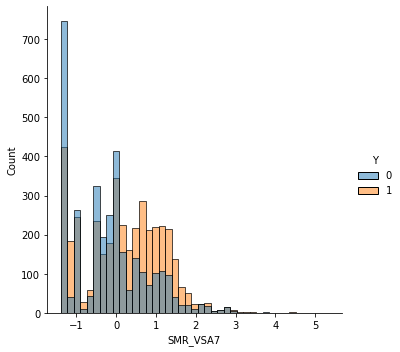

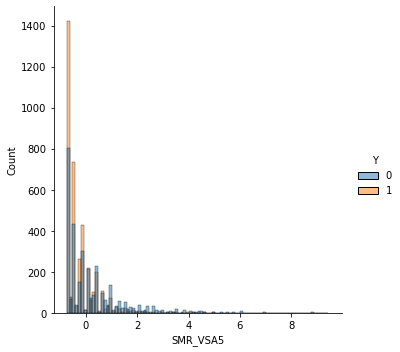

In [32]:
# Filtrar os dados por y=1 e y=0
df_y1 = df_global[df_global['Y']==1]
df_y0 = df_global[df_global['Y']==0]

# Criar o displot para fr_C002 em relação a Y
sns.displot(data=df_global, x='SMR_VSA7', hue='Y', kde=False)

# Criar o displot para fr_benzene em relação a Y
sns.displot(data=df_global, x='SMR_VSA5', hue='Y', kde=False)

As colunas SMR_VSA7 e SMR_VSA5 foram aquelas que obtiveram uma maior média quando associadas à coluna Y=1 e Y=0, respetivamente. Como já referido, SMR_VSA é um descritor molecular que mede a distribuição da área superficial da molécula em diferentes regiões. SMR_VSA5 e SMR_VSA7 são valores de SMR_VSA correspondentes às regiões 5 e 7 da molécula, respectivamente. A maior média de SMR_VSA7 em moléculas mutagênicas em comparação com SMR_VSA5 em moléculas não mutagênicas pode ser explicada por diferenças nas características estruturais das moléculas.

Moléculas mutagénicas geralmente têm uma estrutura mais complexa e incluem grupos funcionais que podem ser mais reativos e interagir com o ADN, resultando em danos no material genético. Esses grupos funcionais podem estar localizados em regiões específicas da molécula, como a região 7 (segundo os resultados). Assim, segundo os resultados podemos concluir que a região 7 das moléculas analisadas seria aquela que apresentaria uma estrutura mais complexa sendo por isso mais associdada a um potencial mutagénico.

Uma molécula com uma área superficial maior em uma determinada região pode ser mais propícia a interagir com o ADN e, portanto, pode ter uma maior capacidade mutagênica. No entanto, outros fatores, como a carga elétrica da molécula, sua polaridade e sua solubilidade em água, também podem influenciar sua interação com o ADN e, portanto, sua capacidade mutagênica. Portanto, embora uma pontuação SMR_VSA mais alta numa determinada região ou regiões possa estar associada a uma maior capacidade mutagênica, essa relação é complexa e depende de vários outros fatores.

Através dos gráficos apresentados é possivel verificar, por exemplo, no gráfico do SMR_VSA5, que realmente a coluna Y=1 está associada a menores valores deste parâmetro levando a crer que esta região não está associada a capacidade mutagénica. Todavia, pela interpretação do gráfico relativo a SMR_VSA7 o output parace não clarificar tanto uma diferença entre a coluna Y=0 e Y=1.


Em conclusão, achamos que estes parâmetros do SMR_VSA por si só não são suficientes para criar uma associação direta entre os seus valores e capacidade mutagénica, mas juntamente com os restantes parametros podem ser úteis.

O terceiro "grupo" a ser analisado foi o "SlogP_VSA", bastante utilizada para prever certas propriedades farmacocinéticas de uma molécula, refere-se ao logaritmo do coeficiente de partição octanol-água ajustado para a forma molecular. O coeficiente de partição octanol-água é uma medida da solubilidade de uma molécula em água em comparação com a solubilidade em octanol (um solvente orgânico). A solubilidade é uma propriedade importante de uma molécula, pois pode influenciar a sua absorção, distribuição, metabolismo e excreção no organismo, bem como sua interação com biomoléculas, como proteínas e ADN [4].



In [33]:
# Selecionando as colunas que começam com "SlogP"
cols_SlogP = df_global.filter(regex='^SlogP').columns

# Aplicando a normalização apenas nessas colunas
scaler = StandardScaler()
df_global[cols_SlogP] = scaler.fit_transform(df_global[cols_SlogP])
df_global[cols_SlogP]

SlogP_VSA1  SlogP_VSA10  SlogP_VSA11  SlogP_VSA12  SlogP_VSA2  \
10      2.675908     2.513085    -0.421256    -0.441593   -0.271546   
999    -0.724149    -0.607150    -0.421256    -0.441593   -1.084027   
1003   -0.724149    -0.607150    -0.421256     0.775564   -1.084027   
1005    0.326800    -0.607150    -0.421256    -0.441593   -0.372749   
1006   -0.724149     0.387300    -0.421256    -0.441593   -0.816497   
...          ...          ...          ...          ...         ...   
991    -0.724149     0.387300    -0.421256    -0.441593   -1.084027   
993    -0.724149     0.387300    -0.421256     0.444798   -0.816497   
994     0.212169    -0.607150     3.028650    -0.441593    2.295898   
997    -0.724149    -0.607150    -0.421256     1.284504   -0.241580   
998    -0.724149    -0.607150     0.728713    -0.441593   -0.806541   

      SlogP_VSA3  SlogP_VSA4  SlogP_VSA5  SlogP_VSA6  SlogP_VSA7  SlogP_VSA8  \
10     -0.795797   -0.628698   -0.780329   -1.273520   -0.240166   -0.639963   
999    -0.795797   -0.628698    0.463243   -1.273520   -0.240166   -0.639963   
1003   -0.795797   -0.628698   -0.780329    1.308981   -0.240166    0.303593   
1005    0.084091   -0.628698   -0.198492    0.052567   -0.240166   -0.639963   
1006   -0.795797    1.494343   -0.521102   -0.212651   -0.240166   -0.639963   
...          ...         ...         ...         ...         ...         ...   
991    -0.795797    0.906021   -0.521102   -0.212651   -0.240166   -0.218003   
993     0.009979    0.631605   -0.521102   -0.212651   -0.240166   -0.639963   
994     0.741119   -0.628698    1.805425   -0.477868   -0.240166   -0.639963   
997    -0.138770   -0.628698   -0.780329   -1.273520   -0.240166   -0.639963   
998    -0.795797   -0.628698   -0.780329    1.643871   -0.240166    3.014031   

      SlogP_VSA9  
10           0.0  
999          0.0  
1003         0.0  
1005         0.0  
1006         0.0  
...          ...  
991          0.0  
993          0.0  
994          0.0  
997          0.0  
998          0.0  

[7273 rows x 12 columns]

In [34]:
# Filtrar linhas com Y=0 e selecionar colunas que começam com "SlogP"
df_filtered = df_global.loc[df_global['Y'] == 0].filter(regex='^SlogP')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SlogP_VSA5
Coluna com menor média: SlogP_VSA8


In [35]:
# Filtrar linhas com Y=1 e selecionar colunas que começam com "SlogP"
df_filtered = df_global.loc[df_global['Y'] == 1].filter(regex='^SlogP')

# Calcular a média das colunas e obter o nome da coluna com maior e menor média
col_max = df_filtered.mean().idxmax()
col_min = df_filtered.mean().idxmin()

print(f"Coluna com maior média: {col_max}")
print(f"Coluna com menor média: {col_min}")

Coluna com maior média: SlogP_VSA8
Coluna com menor média: SlogP_VSA5


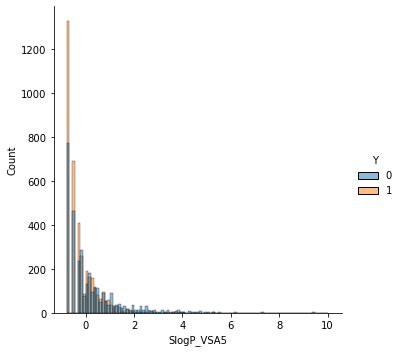

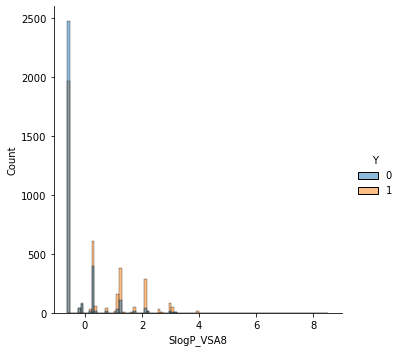

In [36]:
# Filtrar os dados por y=1 e y=0
df_y1 = df_global[df_global['Y']==1]
df_y0 = df_global[df_global['Y']==0]

# Criar o displot para fr_C002 em relação a Y
sns.displot(data=df_global, x='SlogP_VSA5', hue='Y', kde=False)

# Criar o displot para fr_benzene em relação a Y
sns.displot(data=df_global, x='SlogP_VSA8', hue='Y', kde=False)

O SlogP_VSA pode estar associado à capacidade mutagênica de uma molécula, pois pode influenciar sua absorção, distribuição, metabolismo e excreção no organismo, bem como sua interação com biomoléculas, como proteínas e ASN. Moléculas com alta exposição superficial e com valores elevados de SlogP_VSA podem ter uma maior tendência a se acumular em tecidos adiposos e a atravessar membranas biológicas, o que pode afetar a interação da molécula com o ADN e levar a danos genéticos e mutações. Por outro lado, moléculas com baixo SlogP tendem a ser mais hidrofílicas e podem ser eliminadas mais facilmente pelo organismo, diminuindo a exposição a possíveis efeitos mutagénicos [4].

Assim, segundo os resultados obtidos podemos concluir que a coluna SlogP_VSA8 ao ter maior valores pode estar associado a uma capacidade mutagénica presente, ao passo que a coluna SlogP_VSA5 como tem menor média não é expectável que tenha associação a uma capacidade mutagénica. Esta diferença de valores pode estar associada com a região da droga analisada e com o tipo de átomos existentes sendo a região 5 uma zona com átomos de nitrogénios e oxigénios alifáticos e a região 8 com anéis aromáticos e heterocíclicos.

Relativamente aos gráficos a interpretação vai de acordo ao referido na análise do primeiro e segundo grupos analisados, isto é, a maior parte das drogas associadas a Y=0, sem capcidade mutagénica, têm valores ausentes na coluna SlogP_VSA8 e as drogas com capacidade mutagénica têm valores mais elevados. No que concerne ao gráfico que representa a associação da capacidade mutagénica, Y=0 ou Y=1, e SlogP_VSA5 a interpretação é semelhante, mas feita de maneira inversa, ou seja, a maior parte dos valores de SlogP_VSA5, associados a Y=1, são baixos e os valores mais elevados estão associados a um Y=0. 

Salientar que, assim como acontece com outros descritores moleculares, a relação entre SlogP_VSA e a capacidade mutagénica de uma molécula é complexa e depende de muitos outros fatores, como a presença de grupos funcionais reativos e a estrutura tridimensional da molécula. Portanto, a análise de dados de SlogP_VSA por si só não é suficiente para determinar se uma molécula é mutagênica ou não.

De seguida, decidimos explorar o MinAbsEStateIndex e MaxAbsEStateIndex que são descritores moleculares que medem a polaridade e a eletronegatividade de uma molécula.

O MinAbsEStateIndex é o valor absoluto do menor valor de índice de estado de elétrons (EState) na molécula, enquanto o MaxAbsEStateIndex é o valor absoluto do maior valor de índice de estado de elétrons na molécula. O EState é uma medida de eletronegatividade que atribui valores numéricos aos átomos em uma molécula com base em sua capacidade de atrair eletrões em uma ligação covalente.

Em termos gerais, quanto maior o valor de MinAbsEStateIndex ou MaxAbsEStateIndex, maior a polaridade e a eletronegatividade da molécula, o que pode estar associado a uma maior capacidade mutagênica. Moléculas polares e eletronegativas têm maior probabilidade de interagir com moléculas biológicas, como proteínas e ADN, levando a danos genéticos e mutações [6] [7]. No entanto, é importante lembrar que o efeito de um descritor molecular específico na capacidade mutagénica pode ser influenciado por outros fatores, como a estrutura química geral da molécula e a dose. Além disso, no caso da polaridade molecular por si só, não induz a mutação, mas indiretamente pode fazê-lo por, por exemplo, inibição de enzimas funcionais levando a condições favoráveis de mutagênese [7].

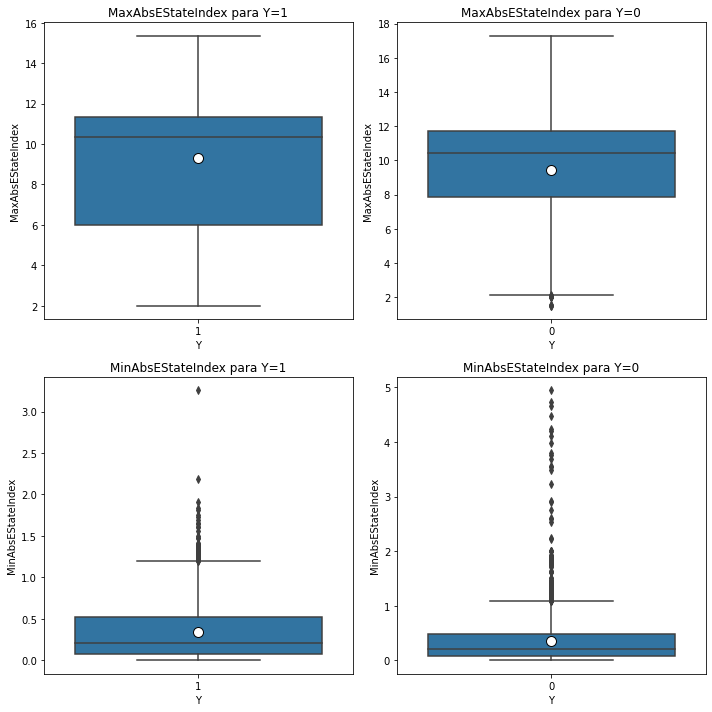

In [37]:
# criar os quatro dataframes para cada combinação de y e coluna
df_y1_maxabs = df_global[df_global['Y'] == 1][['Y', 'MaxAbsEStateIndex']]
df_y0_maxabs = df_global[df_global['Y'] == 0][['Y', 'MaxAbsEStateIndex']]
df_y1_minabs = df_global[df_global['Y'] == 1][['Y', 'MinAbsEStateIndex']]
df_y0_minabs = df_global[df_global['Y'] == 0][['Y', 'MinAbsEStateIndex']]

# criar a figura e os subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# plotar cada boxplot nos subplots correspondentes
sns.boxplot(x='Y', y='MaxAbsEStateIndex', data=df_y1_maxabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[0, 0])
axs[0, 0].set_title('MaxAbsEStateIndex para Y=1')

sns.boxplot(x='Y', y='MaxAbsEStateIndex', data=df_y0_maxabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[0, 1])
axs[0, 1].set_title('MaxAbsEStateIndex para Y=0')

sns.boxplot(x='Y', y='MinAbsEStateIndex', data=df_y1_minabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[1, 0])
axs[1, 0].set_title('MinAbsEStateIndex para Y=1')

sns.boxplot(x='Y', y='MinAbsEStateIndex', data=df_y0_minabs, showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"}, ax=axs[1, 1])
axs[1, 1].set_title('MinAbsEStateIndex para Y=0')

# ajustar o espaçamento entre os subplots
plt.tight_layout()

# exibir o gráfico
plt.show()





In [38]:
df_global.loc[df_global['MaxAbsEStateIndex'].nlargest(5).index, ['MaxAbsEStateIndex', 'Y']]


MaxAbsEStateIndex  Y
6175          17.286264  0
5396          16.859064  0
4765          15.351137  1
6756          15.351137  1
2471          15.192673  1

In [39]:
df_global.loc[df_global['MinAbsEStateIndex'].nlargest(5).index, ['MinAbsEStateIndex', 'Y']]


MinAbsEStateIndex  Y
863            4.944445  0
3917           4.736111  0
6445           4.666666  0
4989           4.475013  0
5727           4.236111  0

Da análise dos boxplot criados, é possivel verificar de imediato que os resultados não vão de acordo ao que era expectável, uma vez que, os valores mais elevados das colunas analisadas encontram-se associados a um Y=0. Este aspecto pode ser devido à interação de outros fatores no decorrer do precesso de análise, tais como a dose ou a própria estrutura química. Isto não significa que os dados que temos estão errados, ou algo do género, apenas vem salientar o que temos referido que é, associar a capcidade mutagénica a uma ou duas colunas por si só pode nao ser suficiente nem a estratégia mais correta.


Além disso, as médias representadas pela bola branca também parecem bastante semelhantes e na coluna MinAbsEStateIndex parece existir um conjunto de pontos outliers que também podem interferir negativamente com a visualização dos dados e respetivas conclusões

O QED (Quantitative Estimate of Drug-likeness) é um índice que mede a probabilidade de uma molécula ser um bom fármaco com base em sua estrutura química. O QED varia de 0 a 1, onde valores mais próximos de 1 indicam maior probabilidade de a molécula ser um bom fármaco [8]. Desta forma, o nosso intuito foi explorar esta coluna e verificar se os dados obtidos vao de acordo ao expectável na medida em que se o qed tiver um valor muito elevado o farmaco é bom e portanto não terá capacidade mutagénica presente.

In [40]:
stat, p_value = shapiro(df_global['qed'])

print(f'Statistics={stat:.4f}, p-value={p_value:.9f}')
if p_value > 0.05:
    print('A distribuição é normal')
else:
    print('A distribuição não é normal')


Statistics=0.9967, p-value=0.000000000
A distribuição não é normal


c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


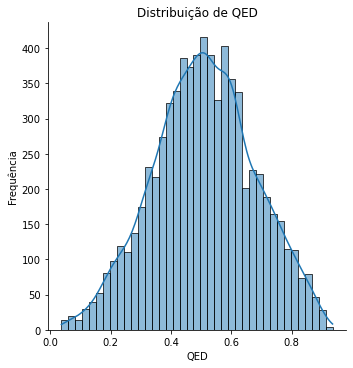

In [41]:
sns.displot(df_global, x='qed', kde=True)
plt.title('Distribuição de QED')
plt.xlabel('QED')
plt.ylabel('Frequência')
plt.show()

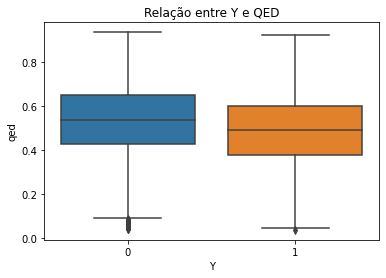

In [42]:
# separar os dados por valor de Y
df_y1 = df_global[df_global['Y'] == 1]
df_y0 = df_global[df_global['Y'] == 0]

# criar o boxplot
sns.boxplot(x='Y', y='qed', data=df_global)
plt.title('Relação entre Y e QED')
plt.xlabel('Y')
plt.ylabel('qed')
plt.show()

Em relação à capacidade mutagénica, a literatura científica indica que compostos com maior QED tendem a ter menor capacidade mutagénica, já que eles são mais propensos a possuir perfis moleculares que são mais compatíveis com a interação com proteínas-alvo específicas e menos propensos a se ligarem aleatoriamente ao ADN, reduzindo assim o risco de danos ao material genético [9]. Como é possivel verificar pela análise do boxplot, a informação descrita na literatura não pôde deveras ser observada.

No entanto, é importante lembrar que a capacidade mutagênica também depende de outros fatores, como a presença de grupos funcionais específicos, tamanho da molécula e estrutura química geral, portanto, a relação entre QED e capacidade mutagênica não é determinística e precisa ser avaliada caso a caso.

Algo que nos dispertou interesse foi verificar como seria a distribuição dos pesos molecuares exatos das moléculas em análise. E, posteriormente, verificar se poderia existir uma associação entre por exemplo moléculas com peso molecular elevado e sua determinada capacidade mutagénica.
O ExactMolWt é o peso molecular exato de uma molécula, ou seja, é a soma das massas atómicas de todos os átomos presentes na molécula, levando em consideração os isótopos naturais e suas abundâncias relativas. É uma medida importante para caracterizar a estrutura química de uma molécula e é frequentemente utilizada para avaliar a relação entre a estrutura molecular de um composto e suas propriedades físico-químicas e biológicas, como a capacidade mutagénica [10].


In [43]:

stat, p_value = shapiro(df_global['ExactMolWt'])

print(f'Statistics={stat:.4f}, p-value={p_value:.4f}')
if p_value > 0.05:
    print('A distribuição é normal')
else:
    print('A distribuição não é normal')




Statistics=0.9301, p-value=0.0000
A distribuição não é normal


c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


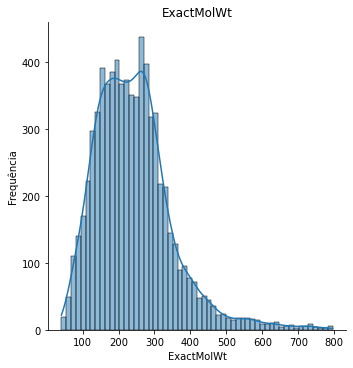

In [44]:
sns.displot(df_global, x='ExactMolWt', kde=True)
plt.title('ExactMolWt')
plt.xlabel('ExactMolWt')
plt.ylabel('Frequência')
plt.show()

Através do teste shapiro foi possivel observar que a distribuição dos dados associação ao ExactMolWt não é normal. Todavia, o nosso principal foco nesta fase de análise era associar a capacidade mutagénica de uma droga a um eventual range de peso molecular.

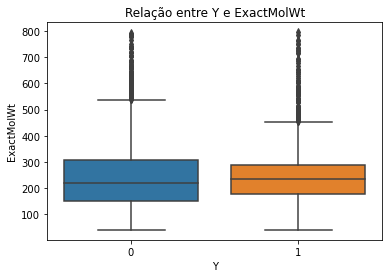

In [45]:
# separar os dados por valor de Y
df_y1 = df_global[df_global['Y'] == 1]
df_y0 = df_global[df_global['Y'] == 0]

# criar o boxplot
sns.boxplot(x='Y', y='ExactMolWt', data=df_global)
plt.title('Relação entre Y e ExactMolWt')
plt.xlabel('Y')
plt.ylabel('ExactMolWt')
plt.show()


Pela análise do boxplot demonstrado acima, em termos visuais, não parece que possamos associar um determinado range de peso molecular à capacidade mutagénica. Todavia a literatura, diz o contrário, mas também refere que a presença de determinados grupos químicos e suas interações têm um efeito mais preponderante na capacidade mutagénica [10].

Para aprofundar a análise univariada já realizada é possivel ainda utilizar testes estatisticos que vão permitir ter uma maior certeza de quais as features com maior ou menor relevância em relação à coluna Y. Desta forma, podemos utilizar o teste t-Student para comparar as médias das variáveis independentes entre as duas classes de Y ( 0 e 1, associado à capacidade mutagénica).

Assim, o primeiro passo foi verificar qual destas colunas dispõem de distribuição normal, realizando o teste de shapiro, sendo que a H0: segue uma distribuição normal e H1: não segue uma distribuição normal.

In [46]:
sig_level = 0.05  
normal_cols = []  #lista para guardar as colunas com distribuição normal
non_normal_cols = []  # lista para guardar as colunas com distribuição não normal

for col in df_global.iloc[:, 3:210]:
    stat, p_value = shapiro(df_global[col])
    
    if p_value > sig_level:
        normal_cols.append(col)
    else:
        non_normal_cols.append(col)

print(f'Colunas com distribuição normal: {normal_cols}')
print(f'Colunas com distribuição não normal: {non_normal_cols}')


Colunas com distribuição normal: ['SMR_VSA8', 'SlogP_VSA9', 'fr_prisulfonamd']
Colunas com distribuição não normal: ['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR

c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\guilh\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


A maioria das colunas presentes do dataframe não dispõem de distribuição normal, ou seja, na maior parte das vezes o H0 foi rejeitado (pois p-value < alfa). Sendo assim, para as colunas que têm uma distribuição normal, foi realizado teste t, para as restantes foi utilizado o teste de Mann-Whitney, onde as hipóteses para ambos os testes são:
H0: Não há diferenças significativas entre a feature em análise e a capacidade mutagénica; H1- Há diferenças significativas entre a feature em análise e a capacidade mutagénica.

In [47]:
# selecionar as colunas não-normais
non_normal_cols = [col for col in df_global.columns[3:211] if col not in normal_cols]

results = {}
for col in normal_cols:
    y0 = df_global.loc[df_global['Y'] == 0, col]
    y1 = df_global.loc[df_global['Y'] == 1, col]
    stat, p_value = ttest_ind(y0, y1)
    print(p_value)
# percorrer as colunas não-normais e calcular o teste de Mann-Whitney
for col in non_normal_cols:
    y0 = df_global.loc[df_global['Y'] == 0, col]
    y1 = df_global.loc[df_global['Y'] == 1, col]
    stat, p_value = mannwhitneyu(y0, y1, alternative='two-sided')
    results[col] = p_value

# classificar o dicionário com base nos valores de p-value
sorted_results = sorted(results.items(), key=lambda x: x[1])
print(sorted_results)

top10_cols = [col[0] for col in sorted_results[:10]]
top10_cols.insert(0, "Y")


print(top10_cols)




nan
nan
nan
[('SlogP_VSA8', 1.0525420266464707e-133), ('fr_nitro', 5.218876650092251e-91), ('HallKierAlpha', 5.698375472638977e-91), ('NumAromaticRings', 1.1374805682231892e-90), ('SMR_VSA5', 2.113822892051272e-75), ('fr_benzene', 5.176000102261982e-75), ('NumAromaticCarbocycles', 6.741056973249058e-75), ('SMR_VSA7', 8.202725422310558e-69), ('RingCount', 2.108773157845818e-65), ('SlogP_VSA10', 3.499413533458884e-65), ('fr_nitro_arom_nonortho', 1.3612125803025288e-64), ('fr_nitro_arom', 7.905058308167507e-63), ('fr_NH0', 2.951590245271424e-61), ('fr_bicyclic', 8.377633994540488e-60), ('FractionCSP3', 3.553354269431986e-58), ('BertzCT', 1.501653091633677e-56), ('SMR_VSA10', 6.392302388734683e-54), ('SlogP_VSA5', 9.659282630468409e-54), ('Kappa3', 7.869880615253084e-52), ('VSA_EState6', 2.4578108419885353e-50), ('SlogP_VSA6', 2.5685823224424386e-50), ('VSA_EState8', 4.095917485980558e-41), ('NumSaturatedCarbocycles', 3.61441518067857e-37), ('fr_nitroso', 3.1865124545630994e-36), ('PEOE_VS

In [48]:
#exemplo de uma das featues que teve pvalue=nan, tem valor de 0 quer para Y=0 como para y=1 ou seja sem variancia
print(df_global['fr_prisulfonamd'])


10      0.0
999     0.0
1003    0.0
1005    0.0
1006    0.0
       ... 
991     0.0
993     0.0
994     0.0
997     0.0
998     0.0
Name: fr_prisulfonamd, Length: 7273, dtype: float64


É possivel observar que o p-value das 3 features que apresentaram, segundo o teste de shapiro, distribuição normal é "nan". Isto é devido ao facto de estas colunas apenas apresentarem um unico valor, ou seja, a variância das amostras é zero. Assim, apenas tivemos em consideração as restantes features, escolhendo um top 10 das colunas que segundo o teste de Mann-Whitney apresentam um menor p-value e por isso uma maior diferença siginifcativa o que pode significar uma maior contribuição na capacidade mutagénica de uma droga.

Referenciar apenas que introduzimos no dicionário os dados da coluna Y, para ser possivel observar a correlação entre esta variavel e as restantes 10 que obtiveram um menor p-value. Esta análise é usada para medir o grau de associação entre duas variáveis, de modo que se uma variável se altera, a outra também se altera de alguma forma. O coeficiente de correlação é uma medida numérica que varia entre -1 e 1, em que valores próximos a -1 indicam uma correlação negativa forte, valores próximos de 1 indicam uma correlação positiva forte, e valores próximos de 0 indicam ausência de correlação. 

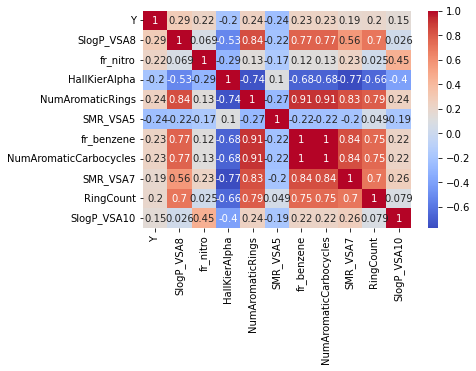

In [49]:
df_top_10 = df_global[top10_cols]

# Calcular a matriz de correlação
corr = df_top_10.corr()

# Plotar a matriz de correlação
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()


Relativamente à análise do heatmap , em primeiro lugar, é possivel observar uma elevada correlação positiva por exemplo entre a coluna NumAromaticRings e fr_benzene e NumAromaticCarbocycles o que é completamente óbvio e reforça veracidade de posteriores interpretações.


Reforçando e direcionando a análise para a correlação das features em questão com a coluna Y, observa-se de um modo geral que nenhuma delas tem uma correlação muito forte (perto de 1 ou -1), quer seja positiva ou negativa. Este aspeto reforça o que é descrito na literatura, ou seja, na análise deste tipo de dataset de exploração da capacidade mutagénica de uma droga é estritamente necessário ter em consideração mais do que uma feature.


Fazendo um paralelismo com os resultados anteriores, é possivel verificar que a correlação entre a coluna Y e a SMR_VSA5 é negativa o que faz sentido, uma vez que esta foi descrita anteriormente como sendo significativamente diferente, mas associada a uma não capacidade mutagénica (daí o sinal -). 

O contrário se verifica quando se analisa a correlação positiva entre SloP_VSA8 e fr_benzene e a coluna Y, indo de encontro ao referido anteriormente onde ambas colunas são significativamente diferentes e associadas à existência da capacidade mutagénica (sinal +).

Poderíamos realizar um heatmap, por exemplo, relacionando um top 30 colunas, com mais diferença siginificativa mas a interpretação dos dados iria se basear nos mesmos parâmetros. Contudo, queremos reforçar a ideia de que na interpetação deste dataset e na associação de certas colunas à capacidade mutagénica é necessário sempre ter em consideração a influência de diversas colunas (features).

# Análise estatísticas multivariada (não-supervisionada)

## Pré-processamento dos dados

Uma vez que agora vamos analisar todas as colunas como um todo e não individual o primeiro passo foi realizar a normalização dos dados (features).

In [50]:
array_df = preprocessing.scale(df_features)
data_scale =  pd.DataFrame(array_df, index =df_features.index , columns = df_features.columns)

c:\Users\guilh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [51]:
data_scale.mean()

MaxEStateIndex      -2.350809e-17
MinEStateIndex      -7.724659e-17
MaxAbsEStateIndex   -2.350809e-17
MinAbsEStateIndex   -1.147756e-16
qed                  6.838717e-18
                         ...     
fr_thiazole          1.032959e-15
fr_thiocyan          5.857627e-16
fr_thiophene        -8.816641e-16
fr_unbrch_alkane    -4.775882e-16
fr_urea              3.006593e-16
Length: 208, dtype: float64

In [52]:
data_scale.std()

MaxEStateIndex       1.000069
MinEStateIndex       1.000069
MaxAbsEStateIndex    1.000069
MinAbsEStateIndex    1.000069
qed                  1.000069
                       ...   
fr_thiazole          1.000069
fr_thiocyan          1.000069
fr_thiophene         1.000069
fr_unbrch_alkane     1.000069
fr_urea              1.000069
Length: 208, dtype: float64

Conseguimos avaliar, tal como era esperado, a correta normalização dos dados sendo que a média e o desvio padrão estão muito próximos do valor 0 e 1, respetivamente.

PCA é uma técnica de análise multivariada que tem como objetivo reduzir a dimensionalidade dos dados mantendo o máximo de informação possível. As componentes principais são ordenadas em ordem decrescente de importância, de modo que o primeiro componente principal representa a maior parte da variância nos dados, o segundo componente representa a segunda maior parte e assim por diante. Dessa forma, é possível reduzir a dimensionalidade dos dados mantendo a maior parte da informação importante.

Para este dataset, nós selecionamos um numero de componentes principais que representasse pelo menos 70% dos dados. Para esse fim, a primeira etapa foi realizar de uma forma automática, a soma de todos os principais componentes, ordenados de forma descendente, até obter 0.7 e a partir daí saber o numero total de componentes necessários(n_components).  

In [49]:
#automatização da procura de um n
n_components = 1
pca = PCA(n_components=n_components)
pca.fit(data_scale)
var_exp = pca.explained_variance_ratio_.cumsum()[n_components-1]

while var_exp < 0.7:
    n_components += 1
    pca = PCA(n_components=n_components)
    pca.fit(data_scale)
    var_exp = pca.explained_variance_ratio_.cumsum()[n_components-1]

print(f"Número mínimo de componentes principal para representar 70% da variância: {n_components}")


Número mínimo de componentes principal para representar 70% da variância: 31


Var. explicada: [0.17022739 0.07935862 0.05283115 0.03837729 0.03248811 0.03058048
 0.02723755 0.02328307 0.02083342 0.01845892 0.01738141 0.01692997
 0.01485035 0.01305522 0.01173096 0.01172464 0.01116642 0.01025948
 0.0098362  0.00950668 0.00925937 0.00873159 0.00837526 0.00805353
 0.00777675 0.0076167  0.00731856 0.00702216 0.00666261 0.00655017
 0.00621077]
Soma: 70.36947893377426 %


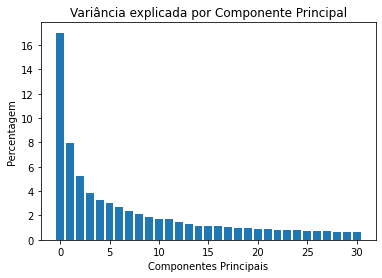

In [50]:
#Estamos a trabalhar com 31 componentes principais pois temos como obetivo obter 70% do dados
n=n_components
pca_ames = PCA(n_components=n)
pca_ames.fit(data_scale)
X_r = pca_ames.transform(data_scale) 

print('Var. explicada: %s'% str(pca_ames.explained_variance_ratio_))
print('Soma:', sum(pca_ames.explained_variance_ratio_) * 100, "%")

plt.bar(range(n), pca_ames.explained_variance_ratio_*100)
#plt.xticks(range(n), ['PC'+str(i) for i in range(1, n+1)])
plt.title("Variância explicada por Componente Principal")
plt.ylabel("Percentagem")
plt.xlabel("Componentes Principais")
plt.show()

O gráfico acima demonstra a representação de cada componente principal, sendo de realçar a grande diferença entre o primeiro componente principal (17% do dataset) e o trigésimo (0.06%).

<function matplotlib.pyplot.show(close=None, block=None)>

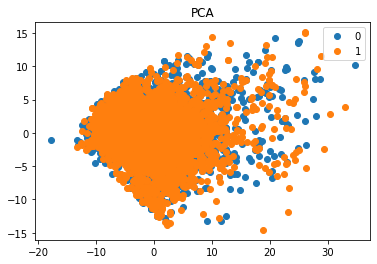

In [51]:
for c in df_global["Y"].unique():
    y= df_global.index[df_global['Y']== c]-1
    plt.plot(X_r[y,0], X_r[y,1], 'o', label= c)
plt.title("PCA")
plt.legend(loc='best', shadow=False)
plt.show

Este código realiza um gráfico de dispersão dos dois primeiros componentes principais do PCA em relação às duas classes presentes na variável Y do seu conjunto de dados. 


Este gráfico mostra a representação dos dados em duas dimensões, com o eixo X representando a primeira componente principal e o eixo Y representando a segunda componente principal. Cada ponto no gráfico representa uma observação do conjunto de dados, e a cor do ponto indica a classe a que pertence (Y=0 ou Y=1).

A partir desse gráfico, é possível observar como as classes se separam no espaço das duas primeiras componentes principais. Neste caso em concreto as classes estão na sua maior parte sobrepostas, o que poderia significar que as variáveis originais não sejam tão boas para discriminar as classes e outras técnicas de análise e modelagem podem ser necessárias. Lembrando ainda que existem 30 componentes principais que representam 70 % dos dados e aqui apenas estamos a trabalhar com duas componentes principais que representam aproximadamente 25 % dos dados, ou seja, estas duas componentes principais não são suficientes para capturar todas as variações presentes nos dados. Além disso, o gráfico em questão é de duas dimensões sendo que muito provavelmte para esta situação o mais adequado seria, se possivel, explorar gráficos com mais dimensões (o que dificultaria sua interpretação) ou até usar outras ferramentas de análise.

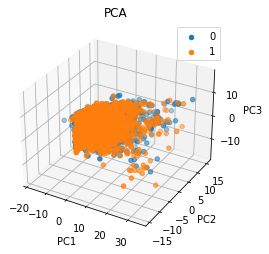

In [52]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c in df_global["Y"].unique():
    y = df_global.index[df_global['Y'] == c] - 1
    ax.scatter(X_r[y, 0], X_r[y, 1], X_r[y, 2], label=c)

ax.set_title("PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(loc='best', shadow=False)

plt.show()


À medida que aumentamos as dimensões dos gráfico as classes podem ter tendência a ficar menos sobrepostas, contudo fica mais dificil ao olho humano a sua interpretação.

### tSNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) é um algoritmo de redução de dimensionalidade,  particularmente útil para visualizar dados em duas ou três dimensões, tornando mais fácil a identificação de clusters ou padrões nos dados. Ao contrário do PCA, que é linear e preserva a estrutura global dos dados, o t-SNE é não-linear e enfatiza as diferenças locais nos dados, o que pode torná-lo mais adequado para a visualização de clusters em dados complexos e não-lineares.

O parâmetro n_components do t-SNE determina a dimensão da representação de saída dos dados, tal como descrito anteriormente com o PCA. Como temos grande número de colunas e desejamos reduzir o número de dimensões para facilitar a visualização optamos por usar um número pequeno de componentes, como 2 ou 3.

O parâmetro n_iter no t-SNE é o número de iterações do algoritmo, ou seja, é o número de vezes que o t-SNE irá ajustar os pontos em cada iteração. Ele é usado para otimizar a posição dos pontos de modo que eles fiquem mais separados em relação às suas classes, mas tem um custo computacional alto. Em geral, aumentar o valor de n_iter pode ajudar a melhorar a qualidade da solução encontrada, especialmente se a estrutura dos dados é complexa. No entanto, também pode levar a problemas de sobreajuste, onde o algoritmo se concentra muito nos detalhes locais dos dados e perde a estrutura global dos dados. Portanto, é importante encontrar um equilíbrio entre o tempo de execução e a qualidade da solução ao ajustar o valor de n_iter. Posto isto, utilizamos o valor padrão de 1000, que pode ser sempre ajustado. 



c:\Users\guilh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\guilh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

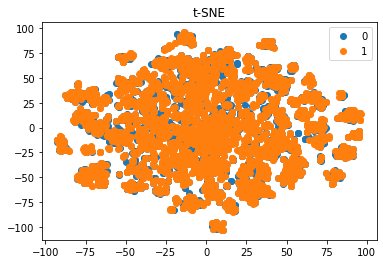

In [53]:
tsne= TSNE(n_components= 2, n_iter=1000)
points= tsne.fit_transform(data_scale)
for c in df_global["Y"].unique():
    y= df_global.index[df_global['Y']== c]-1
    plt.plot(points[y,0], points[y,1], 'o', label= c)
plt.title("t-SNE")
plt.legend(loc='best', shadow=False)
plt.show

c:\Users\guilh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\guilh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


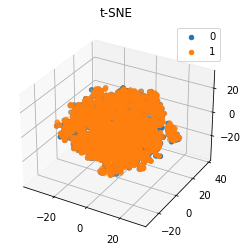

In [54]:
n_components = 3

tsne = TSNE(n_components=n_components, n_iter=1000)

points = tsne.fit_transform(data_scale)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c in df_global["Y"].unique():
    y = df_global.index[df_global['Y'] == c] - 1
    ax.scatter(points[y, 0], points[y, 1], points[y, 2], label=c)

ax.set_title("t-SNE")
ax.legend(loc='best', shadow=False)
plt.show()


Existem diferenças entre os graficos de dispersão apresentados para PCA e para t-SNE.


O t-SNE ao ser técnica não linear, tenta preservar a estrutura local dos dados, ou seja, as relações entre os pontos próximos entre si. Isso pode levar a uma maior sobreposição de pontos no gráfico de dispersão, especialmente quando há muitos pontos ou muitas dimensões nos dados originais.

O PCA, por outro lado, é uma técnica linear que tenta encontrar uma nova base de dados que maximize a variância dos dados em cada componente principal. Como resultado, as informações globais dos dados são mais preservadas e a sobreposição de pontos no gráfico de dispersão é menor. No entanto, é possível que algumas informações importantes sejam perdidas quando se usa o PCA para reduzir a dimensionalidade dos dados, especialmente se a relação entre as variáveis não for linear.

Em suma, a diferença em termos de visualização dos gráficos não é muito acentudada, mas pode ser justificada pelos diferentes princípios explorados pelo t-SNE e pelo PCA.

## Clustering

### Dendograma

Clustering hierárquico é uma técnica de agrupamento de dados que procura criar uma estrutura hierárquica de clusters (ou grupos), onde cada nó do cluster pode ser um cluster ou um objeto individual. 

Uma das principais vantagens do clustering hierárquico é que ele permite visualizar a estrutura do cluster em um dendograma, que é uma representação gráfica da estrutura hierárquica do cluster. Isso pode ser útil para entender melhor como os dados estão agrupados e como as diferentes variáveis afetam a estrutura do cluster.


Na primeira estratégia de clustering realizada, cada objeto é inicialmente considerado como um cluster e, em seguida, os clusters são combinados em pares, com base em uma medida de  distância entre eles. Essa medida pode ser a distância Manhattan, Euclidiana,  correlação entre outras. Sendo de realçar, que quando o numero de colunas a ser analisado é muito extenso pode ser mais apropriado utilizar a distância de correlação.

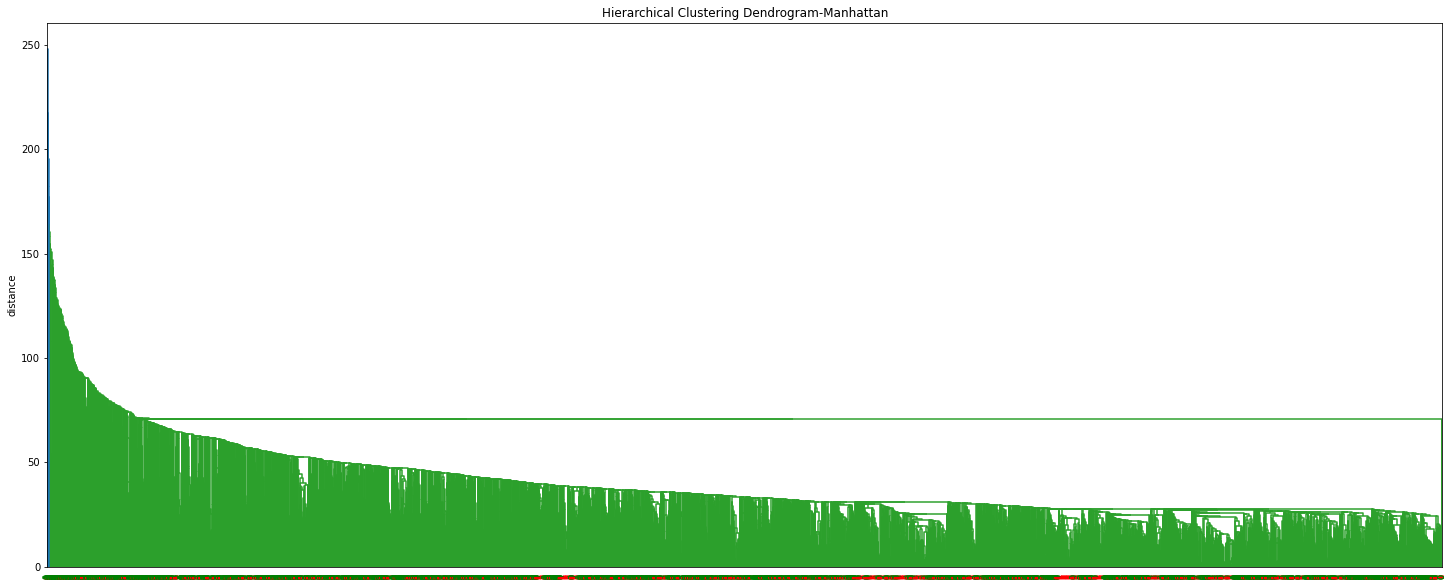

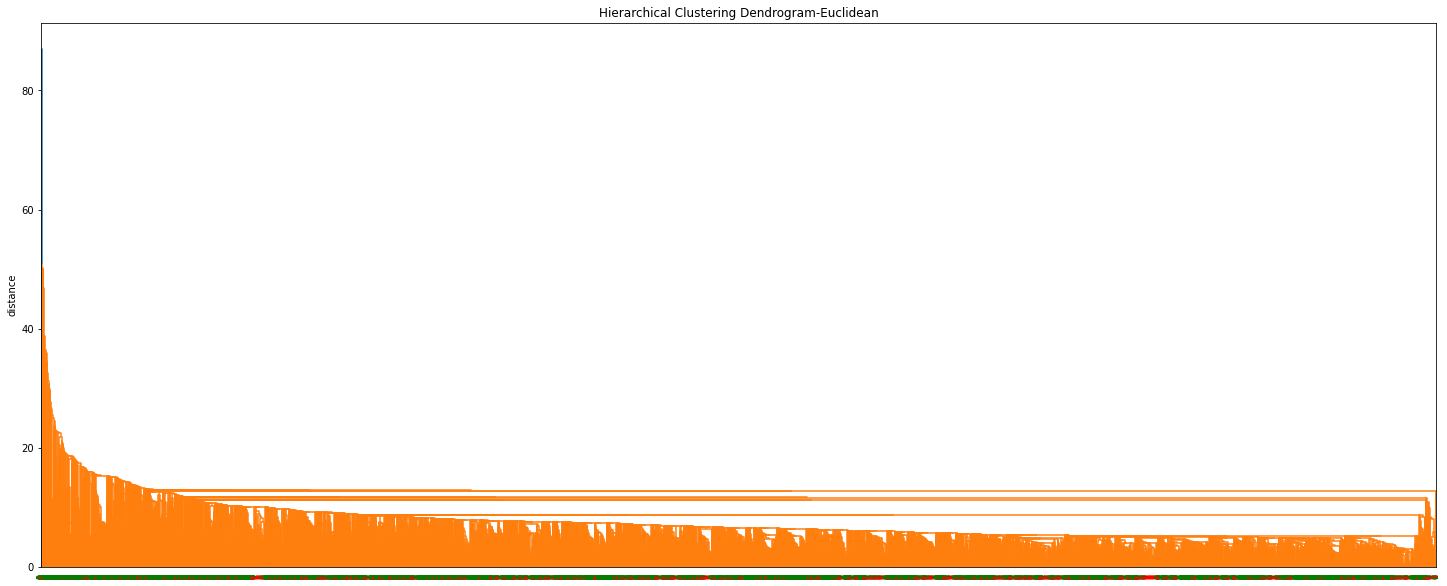

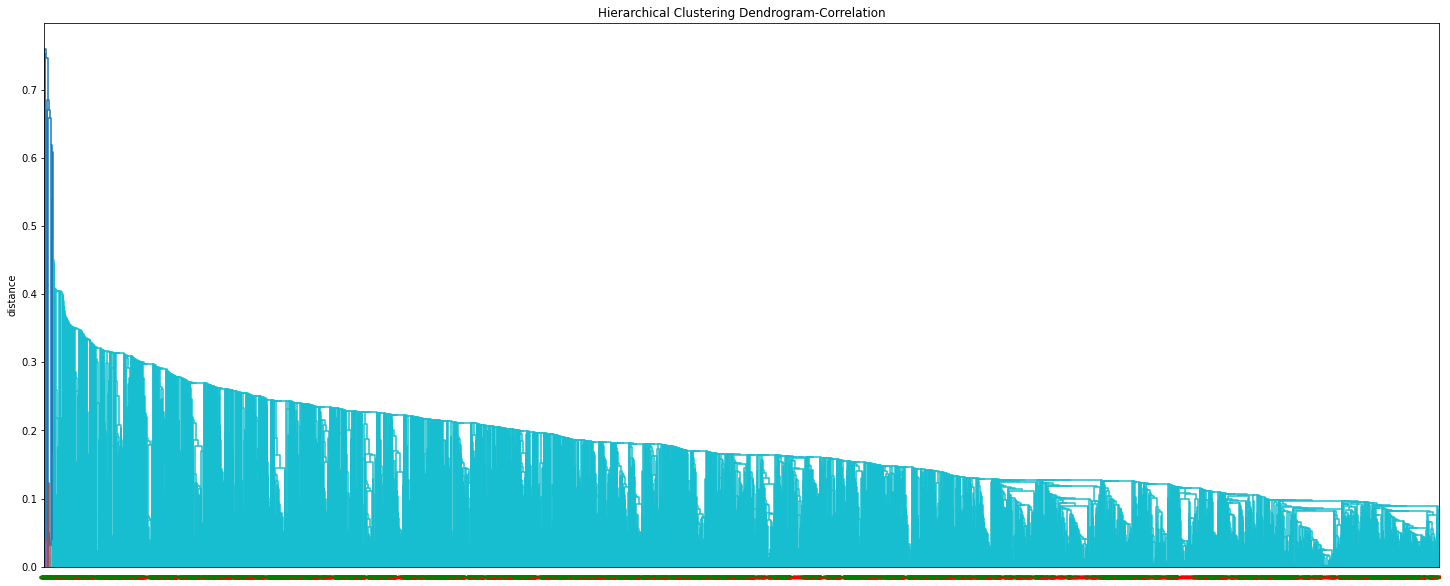

In [54]:
#Distância Manhattan
Z = linkage(data_scale, method='single', metric='cityblock')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(df_ames.iloc[:,2]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram-Manhattan')
plt.ylabel('distance')
# Plota o dendrograma colorindo as folhas de acordo com a classe
label_colors = {"1": 'r', "0": 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

#Distância Euclidean
Z = linkage(data_scale, method='single', metric='euclidean')

#calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(df_ames.iloc[:,2]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram-Euclidean')
plt.ylabel('distance')
# Plota o dendrograma colorindo as folhas de acordo com a classe
label_colors = {"1": 'r', "0": 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

#correlation
Z = linkage(data_scale, method='single', metric='correlation')

#calculate full dendrogram
df_global['Y'] = df_global['Y'].astype(str)
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(df_ames.iloc[:,2]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram-Correlation')
plt.ylabel('distance')
# Plota o dendrograma colorindo as folhas de acordo com a classe
label_colors = {"1": 'r', "0": 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

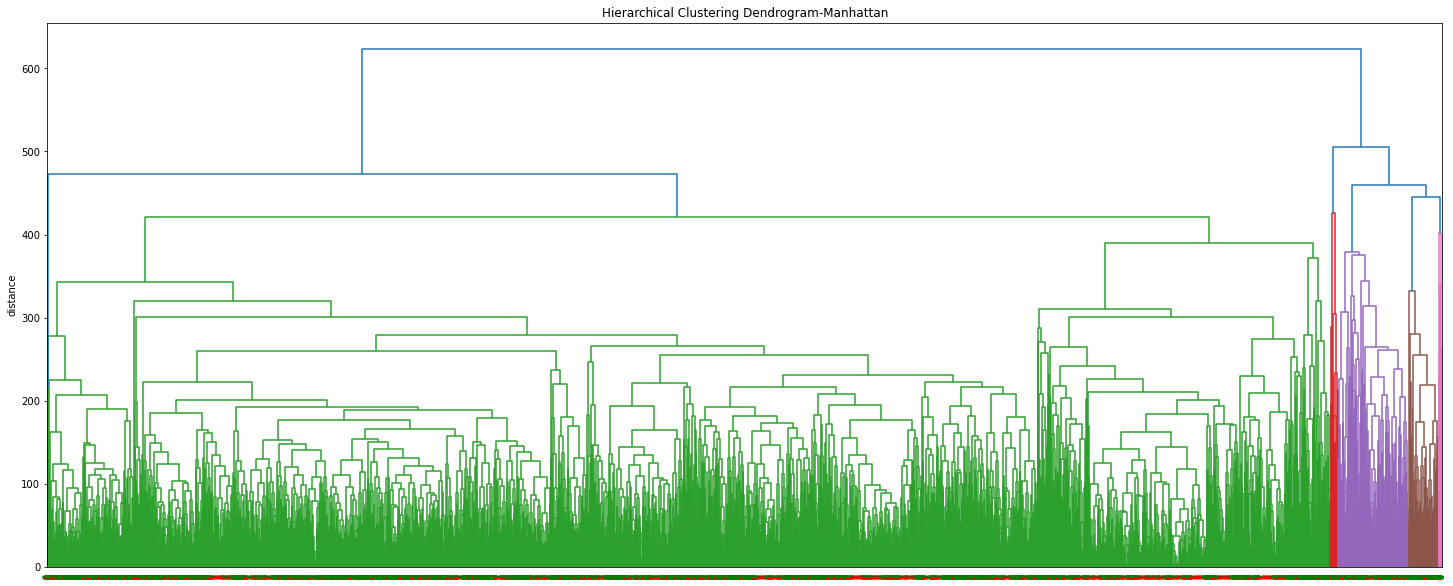

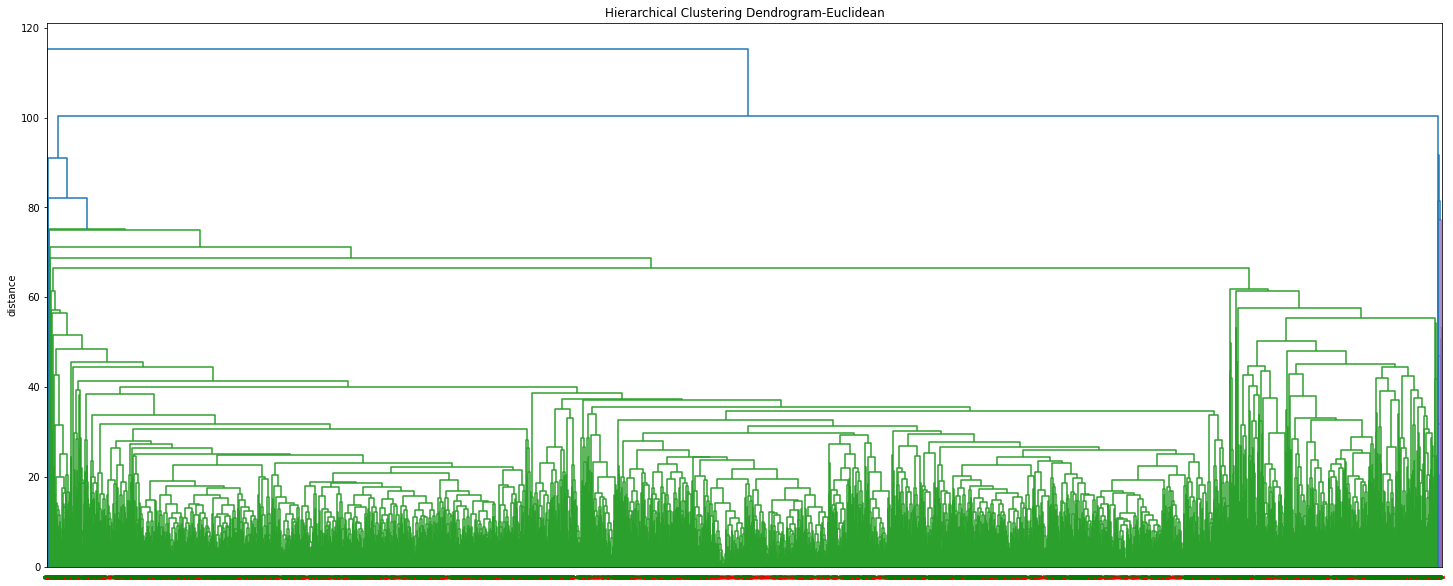

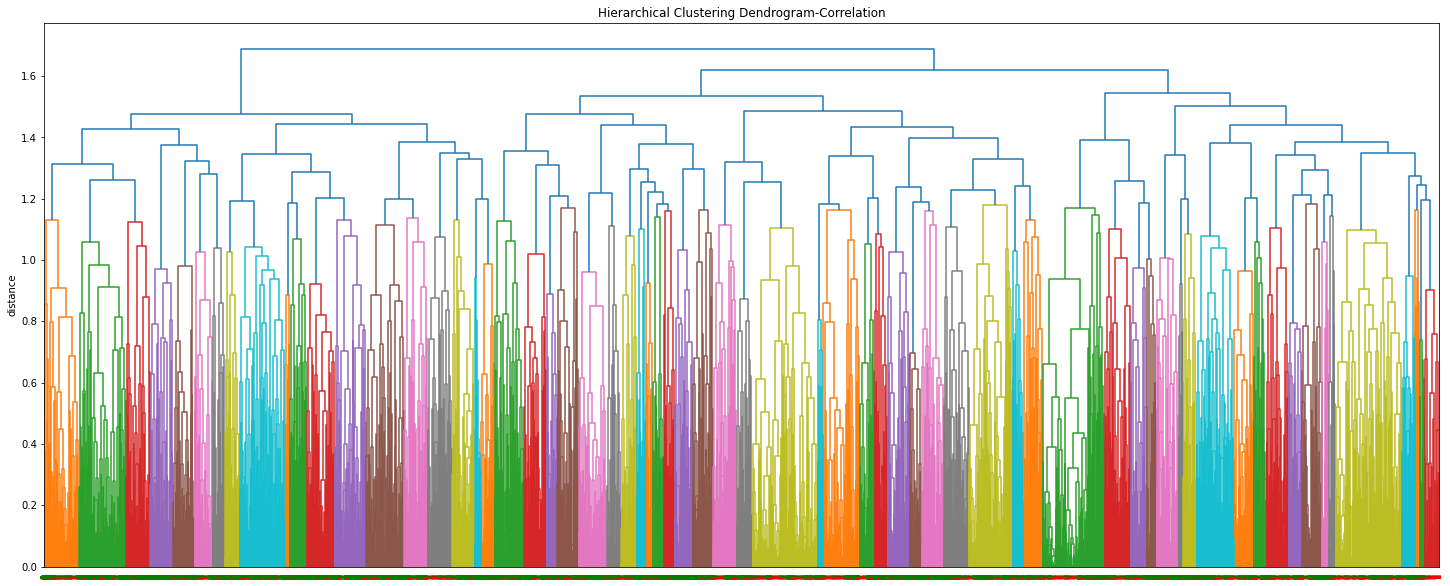

In [143]:
#Distância Manhattan
Z = linkage(data_scale, method='complete', metric='cityblock')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(df_ames.iloc[:,2]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram-Manhattan')
plt.ylabel('distance')
# Plota o dendrograma colorindo as folhas de acordo com a classe
label_colors = {"1": 'r', "0": 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

#Distância Euclidean
Z = linkage(data_scale, method='complete', metric='euclidean')

#calculate full dendrogram
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(df_ames.iloc[:,2]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram-Euclidean')
plt.ylabel('distance')
# Plota o dendrograma colorindo as folhas de acordo com a classe
label_colors = {"1": 'r', "0": 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()

#correlation
Z = linkage(data_scale, method='complete', metric='correlation')

#calculate full dendrogram
df_global['Y'] = df_global['Y'].astype(str)
plt.figure(figsize=(25, 10))
dendrogram(
    Z,
    labels=list(df_ames.iloc[:,2]),
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.title('Hierarchical Clustering Dendrogram-Correlation')
plt.ylabel('distance')
# Plota o dendrograma colorindo as folhas de acordo com a classe
label_colors = {"1": 'r', "0": 'g'}
ax = plt.gca()
xlbls = ax.get_xmajorticklabels()
for lbl in xlbls:
    lbl.set_color(label_colors[lbl.get_text()])

plt.show()





Como o método de ligação (linkage) utilizado na construção do dendrograma pode influênciar na formação dos clusters decidimos explorar 2 tipos de métodos:

O método single: une os dois clusters mais próximos, ou seja, as duas observações com menor distância entre si. Isso pode levar a formação de clusters com formas muito irregulares.

Por outro lado, o método complete:  une os dois clusters mais distantes, ou seja, as duas observações com maior distância entre si. Isso tende a formar clusters mais compactos e esféricos.

Pela simples análise dos clusters obtidos, segundo o método single não se consegue retirar muita informação devido,  principalmente, à alta dimensionalidade dos  dados. Em altas dimensões, a distância Euclidiana e a distância Manhattan tendem a se tornar cada vez mais semelhantes, o que pode dificultar a formação de clusters significativos. Dessa forma tentamos melhorar o output com a exploração da distância de correlação e verificamos ligeiras diferenças, todavia não é possivel observar a presença de diversos clusters, como se todos os dados fossem praticamente agrupados num só cluster.

Os clusters obtidos com o método complete  podem criar clusters mais dispersos, porque tem-se em conta a distância máxima entre pontos de clusters diferentes, e daí neste método se estar a observar graficamente um maior aparecimento de clusters.

Em suma , método "complete" tende a formar clusters mais compactos e bem definidos, o que pode resultar em uma maior diversidade de cores no dendrograma, indicando uma maior variação nos tamanhos e formas dos clusters formados. Já o método "single" tende a formar clusters mais dispersos e menos definidos, o que pode levar a um dendrograma com menos cores, indicando que os clusters formados são mais uniformes e menos variáveis. No entanto, é importante lembrar que o número de clusters e a interpretação dos dendrogramas dependem de vários fatores, como a escolha da métrica de distância, o método de ligação e a configuração dos parâmetros do algoritmo de clustering.

Outra estratégia de clustering  permite visualizar a estrutura de agrupamento dos dados, mostrando como os diferentes elementos são agrupados em diferentes níveis de similaridade. Cada ramo no dendograma representa um cluster, e a altura do ponto de união dos ramos indica o nível de dissimilaridade entre os clusters agrupados. A interpretação do dendograma pode ajudar a identificar o número ideal de clusters, bem como a detectar padrões ou subgrupos nos dados. Além disso, a análise do dendograma também pode ajudar a entender as relações entre diferentes grupos e identificar quais são os elementos mais similares ou dissimilares no conjunto de dados.

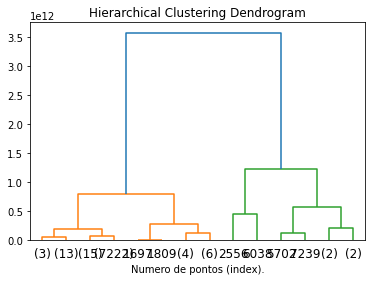

In [55]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_features)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Numero de pontos (index).")
plt.show()

A principal diferença entre os dendogramas gerados é a escala do eixo y. Quando usamos o método de clustering hierárquico com as métricas de distância Euclediana ou Manhattan, a distância entre os clusters é representada diretamente no eixo y, o que permite comparar visualmente a distância entre os clusters e determinar o número adequado de clusters a serem formados. No entanto, quando usamos o método aglomerativo com distance_threshold=0, o eixo y representa a dissimilaridade entre os clusters, em vez da distância, o que dificulta a determinação do número adequado de clusters. Portanto, é preciso definir um valor de corte na dissimilaridade para dividir o dendograma em clusters, o que pode ser mais subjetivo.

Pela interpetação do último clustering, é possivel observar a presença de 3 grupos distintos. Todavia, as distâncias de similaridade são muito altas o que significa que os objetos estão muito distantes uns dos outros em termos das suas características ou propriedades. Isso pode indicar que os objetos são muito diferentes entre si e podem ser agrupados em clusters diferentes. A dissimilaridade elevada pode indicar que há poucos clusters bem definidos, com grande variação entre eles. Isso pode levar a uma separação mais clara de poucos clusters, em vez de muitos clusters indistintos. No entanto, a interpretação exata das distâncias de similaridade depende do contexto do problema e dos dados sendo analisados.

### K-means

O algoritmo K-means começa com a seleção de K centroides iniciais, onde cada centroide representa o centro do cluster. Em seguida, o algoritmo atribui cada observação ao centroide mais próximo e calcula a média de todas as observações atribuídas a cada centroide para atualizar a posição do centroide. Esse processo é repetido até que os centroides não se movam mais ou até que um número máximo de iterações seja atingido. O objetivo do K-means é minimizar a soma das distâncias ao quadrado entre cada observação e o centroide do cluster ao qual ela foi atribuída.

Geralmente, o "método do cotovelo" sugere escolher o valor de k no ponto em que a melhoria no WSS (soma dos quadrados dentro dos clusters) começa a diminuir drasticamente, formando um "cotovelo" no gráfico. Portanto, o objetivo é encontrar o menor valor de k que ainda fornece uma redução significativa na variação dentro dos clusters.

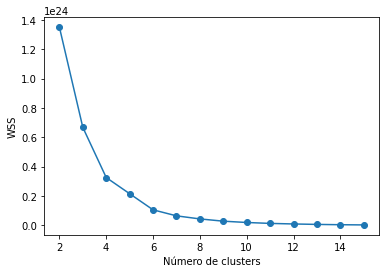

In [145]:
wss = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(df_features)
    wss.append(kmeans.inertia_)

plt.plot(range(2, 16), wss, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('WSS')
plt.show()

Pela interpretação do gráfico chegamos à conlcusão que o k mais apropriado será k=6, pois é aí onde há uma diminuição do valor de WSS mais acentuada.

In [56]:
k=6
kmeans_meta = KMeans(n_clusters=k, max_iter=1000)
kmeans_meta.fit(data_scale)
labels = kmeans_meta.labels_
centroids = kmeans_meta.cluster_centers_

pd.crosstab(labels,df_global["Y"], rownames=['clusters'] )

Y           0     1
clusters           
0         863  1041
1         670   740
2         161   240
3         865  1043
4         622   758
5         118   152

O output obtido é uma tabela de contingência que mostra a distribuição dos pontos do conjunto de dados em relação aos clusters criados pelo algoritmo K-means. As linhas correspondem aos clusters e as colunas correspondem aos valores da variável Y. Cada célula mostra a contagem de pontos que pertencem a um determinado cluster e também têm um determinado valor de Y.
Com base na tabela, podemos ver que os valores de 2010 e 2341 foram atribuídos ao cluster 0, enquanto os valores de 1289 e 1633 foram atribuídos ao cluster 1. Isso sugere que há uma separação relativamente clara entre os dois clusters, mas também há alguma sobreposição nos valores das duas classes.

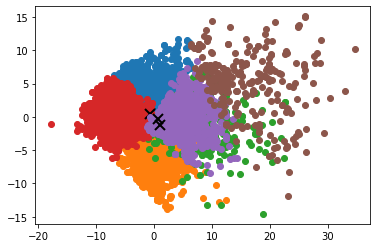

In [57]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_r[np.where(labels==i)]
    # plot the data observations (only 2 first colums)
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
    
# plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r')

plt.show()


Como no "método do cotovelo" também verificamos um declinio  do parametro wss quando k=10, decidimos testar esse valor para verificar se por ventura a separação e respetiva sobreposição seria mais adequada.

In [63]:
k=10
kmeans_meta = KMeans(n_clusters=k, max_iter=1000)
kmeans_meta.fit(data_scale)
labels = kmeans_meta.labels_
centroids = kmeans_meta.cluster_centers_

pd.crosstab(labels,df_global["Y"], rownames=['clusters'] )

Y           0    1
clusters          
0          82   97
1         120  189
2         461  515
3         329  364
4         642  785
5         451  580
6         271  310
7         155  184
8         692  841
9          96  109

Podemos verificar que as conclusões a serem retiradas são idênticas ao que já foi referido anteriormente, onde temos uma boa separação mas com elevada sobreposição.

c:\Users\guilh\anaconda3\lib\site-packages\matplotlib\collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


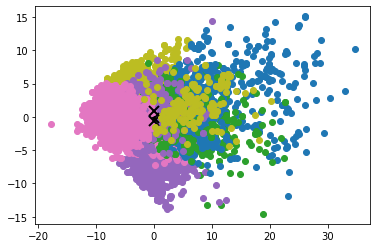

In [64]:
for i in range(k):
    # select only data observations with cluster label == i
    ds = X_r[np.where(labels==i)]
    # plot the data observations (only 2 first colums)
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],centroids[i,2],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
    
# plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], marker='x', color='r')

plt.show()


A análise gráfica com k=6 e k=10, mostra visualmente o que se verificava nas tabelas de contigência, ou seja a clara formação de k clusters, mas onde a sobreposição é abundante. Portanto, não acontece o que provavelmente seria o cenário perfeito, de ter  clusters completamente separados cada um com respetivo centroide associado e cada um a representar apenas Y=0 ou Y=1.

# Análise supervisionada

O método de aprendizagem supervisionada faz previsões de uma nova amostra com base nos dados rotulados/classificados existentes.

In [53]:
df_final # igual ao daframe original

ids                                             smiles  Y  \
10      Drug 10                                    Nc1nc(N)nc(N)n1  0   
999   Drug 1000                                               CCCC  0   
1003  Drug 1004                              Brc1ccc(-c2ccccc2)cc1  0   
1005  Drug 1006                               CN[C@@H](C)Cc1ccccc1  0   
1006  Drug 1007                            Cc1ccc([N+](=O)[O-])cc1  0   
...         ...                                                ... ..   
991    Drug 992                                  Cc1ccc([N+]#N)cc1  1   
993    Drug 994                            O=[N+]([O-])c1ccccc1CCl  1   
994    Drug 995  COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)CC(O)(C(=...  1   
997    Drug 998                                           O=C(O)CI  1   
998    Drug 999                    Oc1ccc2ccc3c4ccccc4cc4ccc1c2c43  1   

      MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
10          5.137222        0.041667           5.137222           0.041667   
999         2.180556        1.319444           2.180556           1.319444   
1003        3.417985        1.117760           3.417985           1.117760   
1005        3.213398        0.567037           3.213398           0.567037   
1006       10.117782       -0.403333          10.117782           0.144074   
...              ...             ...                ...                ...   
991         8.253485        0.597778           8.253485           0.597778   
993        10.327561       -0.432824          10.327561           0.085648   
994        13.159159       -2.206177          13.159159           0.042079   
997         9.360556       -0.758704           9.360556           0.192222   
998        10.159286        0.351906          10.159286           0.351906   

           qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
10    0.394014  126.123         120.075  ...   -0.151043     -0.100753   
999   0.431024   58.124          48.044  ...   -0.151043     -0.100753   
1003  0.694585  233.108         224.036  ...   -0.151043     -0.100753   
1005  0.691109  149.237         134.117  ...   -0.151043     -0.100753   
1006  0.437912  137.138         130.082  ...   -0.151043     -0.100753   
...        ...      ...             ...  ...         ...           ...   
991   0.481977  119.147         112.091  ...   -0.151043     -0.100753   
993   0.389482  171.583         165.535  ...   -0.151043     -0.100753   
994   0.375739  414.366         396.222  ...   -0.151043     -0.100753   
997   0.477887  185.948         182.924  ...   -0.151043     -0.100753   
998   0.292579  268.315         256.219  ...   -0.151043     -0.100753   

      fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
10     -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
999    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
1003   -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
1005   -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
1006   -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
...          ...                ...           ...          ...          ...   
991    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
993    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
994    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
997    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   
998    -0.054017          -0.055082     -0.020314    -0.106561    -0.019152   

      fr_thiophene  fr_unbrch_alkane   fr_urea  
10       -0.088286         -0.175872 -0.128981  
999      -0.088286         -0.175872 -0.128981  
1003     -0.088286         -0.175872 -0.128981  
1005     -0.088286         -0.175872 -0.128981  
1006     -0.088286         -0.175872 -0.128981  
...            ...               ...       ...  
991      -0.08828

In [54]:
# X, i.e. the features or attributes
characters=df_final.to_numpy()
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df_final['Y'].to_numpy()
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

# Normalização

Etapa importante ainda associada ao pré-processamento de dados para modelos de machine learning. Útil para não existir problemas ao nivel da escala nos valores do dataset. No nosso caso optamos por utilizar uma normalização que tem por base um valor minimo de 0 e um valor maximo de 1 e portanto os valores do dataset apenas oscilam entre 0-1.

In [55]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

# Divisão do Dataset

Decidimos dividir o nosso dataset em 80 % para treino e 20 % teste.

In [56]:
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, stratify=Y,  test_size=0.2, random_state=42, shuffle=True)

In [57]:
sss = StratifiedKFold(n_splits =10, random_state=42, shuffle=True) 

Nesta etapa do trabalho o objetivo é fazer previsoes tendo por base os dados existentes, ou seja, prever a classificação  de uma nova amostra.
Para tal, foram treinados e testados 8 modelos: __Support Vector Machine__, __Random Forest__, __Naive Bayes__, __Decision Trees__, __Logistic Regression__,__k-Nearest Neighbors__, __Neural Networks (2 e 3 camadas)__ .
Para cada modelo mencionado, foram explorados diversos hiperparametros. Nesta fase foi utilizado uma técnica de otimização de hiperparametros bastante utilizada em ML que se denomina Gridsearch. Nesta técnica um conjunto de hiperparâmetros é especificado e todas as combinações possíveis desses hiperparâmetros são avaliadas usando validação cruzada. O objetivo é encontrar a combinação de hiperparâmetros que resulte no melhor desempenho do modelo, sendo que nós optamos pela métrica do f1-score como referência.

Para a realização deste trabalho foi sempre tido em consideração um processo de validação cruzada de 10 vezes do nosso conjunto de dados de treino, em que uma parte do conjunto de dados, chamada de conjunto de validação, foi usada para teste e as outras nove foram usadas para treino. Este processo foi iterado mais de dez vezes, usando, por sua vez, cada uma das dez partes como conjunto de validação. Como foi verificado anteriormente, a distribuição dos dados por classe é de aproximadamente 55% 45%  para a classe 1 e 0 , respetivamente. Assim sendo, usamos amostragem estratificada para garantir que há uma percentagem semelhante à existente do dataset original da classe positiva(y=1) e negativa(y=0) quer no dataset treino como test. 

Em relação à avaliação dos modelos iremos ter por base as confusion matrix obtidas, mais concretamente os valores dos TP, TN, FP e FN. Estes valores sao a base das diferentes métricas avaliadas como a precision, accuracy, recall, entre outros.

Em suma, a pipeline realizada daqui em diante para cada um dos modelos de ML e DL mencionados foi a seguinte:

1)otimização dos hiperparametros por gridsearch (10 x cross-validation);

2)treinar o modelo com o melhor conjunto de hiperparametros (80 % dataset-treino);

3)testar o modelo treinado com o dataset test(20% dataset-test)

4)avaliar as métricas obtidas.


# Support vector machine (SVM)

SVM é um modelo que tem desempenhos bastante bons em problemas de classificação binária. Este modelo separa as amostras em diferentes classes utilizando um hiperplano ideal face ao conjunto dos dados. Além disso, é um modelo robusto que pode ser utilizado para classificação e regressão.

### Explorar os hiperparametros e determinar a melhor combinação


In [54]:
parameters = {
    'C': [1,10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 0.01]
}
svm_classifier = SVC()
grid_search = GridSearchCV(svm_classifier, parameters, scoring='f1',cv=5)
grid_search.fit(X_tr[:,3:], y_tr)
best_params = grid_search.best_params_

 ### Treino do modelo SVM com hiperparametros já definidos




In [62]:
SS_classifier = svm.SVC(kernel='rbf', C=1, gamma=0.1,probability=True) #hiperparameters

#demonstrar como seria a aboradagem para fazer cross validation no dataset treino que passaria a ter 10 "parcelas"- 9 treino e uma de validacao
#iremos demonstrar esta abordagem para todos os modelos
for train_index, test_index in sss.split(X_tr, y_tr):
    positive=0
    negative=0
    for i in range(y_tr.shape[0]):
        if (y_tr[i]):
            positive=positive+1
        else:
            negative=negative+1
    
    X_SS_train, X_SS_test, y_SS_train, y_SS_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    


    X_SS_train= min_max_scaler.fit_transform(X_SS_train)
   

    X_SS_test = min_max_scaler.transform(X_SS_test)
   

    SS_classifier.fit(X_SS_train, y_SS_train)
    ypred=(SS_classifier.predict(X_SS_test))
    

### Avaliação do treino do modelo SVM




In [63]:
#treino svm do melhor modelo 
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
SS_classifier.fit(X_new,y_tr)
y_tr_predict = SS_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)

f1 on Train set:  0.8176571517703946
MCC on Train set:  0.5940598135399249
tn, fp, tp, fn 2028 611 2621 558
Specificity on Train set(tn / (tn+fp)):  0.7684729064039408
Sensitivity on Train set(tp / (tp+fn)):  0.8244731047499213
Accuracy on Train set:  0.7990718459951873


### Teste do modelo SVM já treinado e respetivas métricas



In [76]:
#teste svm
X_te_new = X_te[:,3:]
X_te_new = min_max_scaler.transform(X_te_new)
y_SS_pred=SS_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_SS_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_SS_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_SS_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.8083228247162674
MCC on Test set:  0.578727675216874
tn, fp, tp, fn 510 150 641 154
Specificity on Test set(tn / (tn+fp)):  0.7727272727272727
Sensitivity on Test set(tp / (tp+fn)):  0.8062893081761007
Accuracy on Test set:  0.7910652920962199
Precision on Test set:  0.8103666245259166


### Confusion Matrix resultante do teste do modelo SVM



Confusion Matrix:
[[510 150]
 [154 641]]


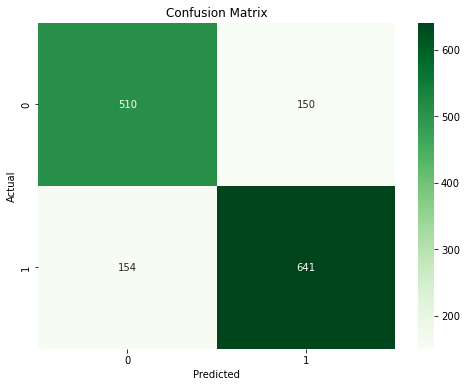

In [77]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_SS_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest 

Random Forest é um método de aprendizagem  que combina várias árvores de decisão para fazer previsões, e que suporta regressão e classificação. Este modelo pode não ser o mais adequado quando o dataset não é equilibrado.

### Explorar os hiperparametros e determinar a melhor combinação

In [78]:
# Definir os parâmetros a ajustar
parameters = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Criar o classificador RandomForest
RF_classifier = RandomForestClassifier(random_state=42)

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(RF_classifier, parameters, scoring='f1', cv=5)

# Executar o grid search usando os dados de treino (X_tr e y_tr)
grid_search.fit(X_tr[:, 3:], y_tr)

# Obter os melhores parâmetros
best_params_RF = grid_search.best_params_
best_params_RF

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 1000}

### Treino do modelo RF com hiperparametros já definidos


In [58]:
#treino
RF_classifier = RandomForestClassifier(random_state=42, max_depth=None, min_samples_split=5, n_estimators=1000)

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_RF_train, X_RF_test, y_RF_train, y_RF_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_RF_train_new = X_RF_train
    X_RF_train_new = min_max_scaler.fit_transform(X_RF_train_new)
    
    X_RF_test_new = X_RF_test
    X_RF_test_new = min_max_scaler.transform(X_RF_test_new)
    
    RF_classifier.fit(X_RF_train_new, y_RF_train)
    y_pred = RF_classifier.predict(X_RF_test_new)

### Avaliação do treino do modelo RF


In [59]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
RF_classifier.fit(X_new, y_tr)
y_tr_predict = RF_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)


f1 on Train set:  0.9956071540633825
MCC on Train set:  0.9903013140754854
tn, fp, tp, fn 2617 22 3173 6
Specificity on Train set(tn / (tn+fp)):  0.9916635089048882
Sensitivity on Train set(tp / (tp+fn)):  0.9981126140295691
Accuracy on Train set:  0.9951873496046751


### Teste do modelo RF já treinado e respetivas métricas

In [60]:
X_te_new = X_te[:,3:]
x_test_df = pd.DataFrame(X_te_new)
X_te_new = min_max_scaler.transform(X_te_new)
x_test_df = pd.DataFrame(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.849714648065948
MCC on Test set:  0.6720553882147856
tn, fp, tp, fn 548 112 670 125
Specificity on Test set(tn / (tn+fp)):  0.8303030303030303
Sensitivity on Test set(tp / (tp+fn)):  0.8427672955974843
Accuracy on Test set:  0.8371134020618557
Precision on Test set:  0.8567774936061381


### Confusion Matrix resultante do teste do modelo RF

Confusion Matrix:
[[548 112]
 [125 670]]


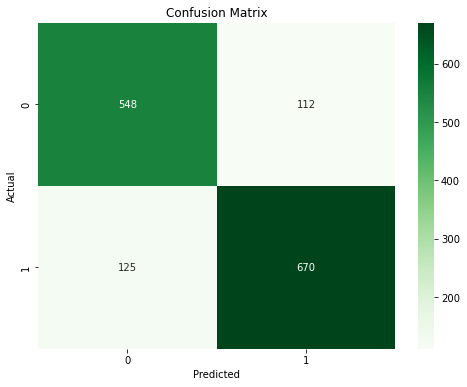

In [61]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_RF_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes

O algoritmo Naïve Bayes é um algoritmo  baseado no teorema de Bayes e usado para resolver problemas de classificação. O teorema em si, determina a probabilidade de uma hipótese com conhecimento prévio (depende da probabilidade condicional).

### Explorar os hiperparametros e determinar a melhor combinação

In [65]:
# Definição dos hiperparâmetros
parameters = {
    'var_smoothing': [1e-12,1e-10,1e-9, 1e-8, 1e-7,1e-5]
}

NB_classifier = GaussianNB()

# Execução do GridSearchCV
grid_search = GridSearchCV(NB_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 3:], y_tr)

# Melhores hiperparâmetros encontrados
best_params_NB = grid_search.best_params_
best_params_NB

{'var_smoothing': 1e-12}

### Treino do modelo NB com hiperparametros já definidos


In [63]:
#treino

NB_classifier = GaussianNB(var_smoothing=1e-12)

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_NB_train, X_NB_test, y_NB_train, y_NB_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_NB_train_new = X_NB_train
    X_NB_train_new = min_max_scaler.fit_transform(X_NB_train_new)
    
    X_NB_test_new = X_NB_test
    X_NB_test_new = min_max_scaler.transform(X_NB_test_new)
    
    NB_classifier.fit(X_NB_train_new, y_NB_train)
    y_pred = NB_classifier.predict(X_NB_test_new)

### Avaliação do treino do modelo NB

In [64]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
NB_classifier.fit(X_new, y_tr)
y_tr_predict = NB_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)


f1 on Train set:  0.7304155939683706
MCC on Train set:  0.25439702851112533
tn, fp, tp, fn 640 1999 2979 200
Specificity on Train set(tn / (tn+fp)):  0.2425161045850701
Sensitivity on Train set(tp / (tp+fn)):  0.9370871343189683
Accuracy on Train set:  0.6220350635957373
Precision on Test set:  0.5984331056649257


### Teste do modelo NB já treinado e respetivas métricas

In [65]:
X_te_new = X_te[:,3:]

X_te_new = min_max_scaler.transform(X_te_new)

y_NB_pred = NB_classifier.predict(X_te_new)
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_NB_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_NB_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_NB_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.7265547877591313
MCC on Test set:  0.2424862874499728
tn, fp, tp, fn 165 495 736 59
Specificity on Test set(tn / (tn+fp)):  0.25
Sensitivity on Test set(tp / (tp+fn)):  0.9257861635220126
Accuracy on Test set:  0.6192439862542956
Precision on Test set:  0.5978878960194963


### Confusion Matrix resultante do teste do modelo NB

Confusion Matrix:
[[165 495]
 [ 59 736]]


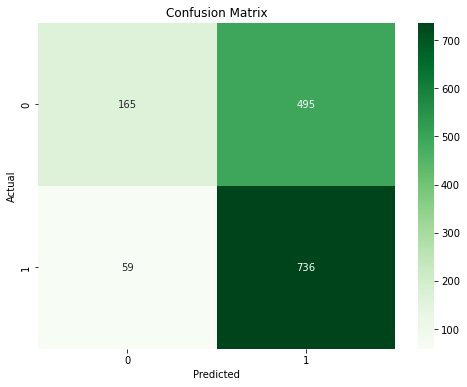

In [66]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_NB_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Decision tree

Árvore de decisão é um modelo que se assemelha a um fluxograma que toma decisões ou previsões, dividindo recursivamente os dados com base em diferentes carateristicas.

### Explorar os hiperparametros e determinar a melhor combinação

In [71]:
#hiperparametros
parameters = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_classifier, parameters, scoring='f1', cv=5)
grid_search.fit(X_tr[:, 3:], y_tr)

best_params_DT = grid_search.best_params_
best_params_DT

{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Treino do modelo DT com hiperparametros já definidos

In [73]:
#TREINO
DT_classifier = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2)

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_DT_train, X_DT_test, y_DT_train, y_DT_test = X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_DT_train_new = X_DT_train
    X_DT_train_new = min_max_scaler.fit_transform(X_DT_train_new)
    
    X_DT_test_new = X_DT_test
    X_DT_test_new = min_max_scaler.transform(X_DT_test_new)
    
    DT_classifier.fit(X_DT_train_new, y_DT_train)
    y_pred = DT_classifier.predict(X_DT_test_new)
   

### Avaliação do treino do modelo DT


In [74]:
X_new =X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
DT_classifier.fit(X_new, y_tr)
y_tr_predict = DT_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)


f1 on Train set:  1.0
MCC on Train set:  1.0
tn, fp, tp, fn 2639 0 3179 0
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  1.0
Accuracy on Train set:  1.0


### Teste do modelo DT já treinado e respetivas métricas


In [76]:
X_te_new = X_te[:,3:]
x_test_df = pd.DataFrame(X_te_new)

X_te_new = min_max_scaler.transform(X_te_new)
x_test_df = pd.DataFrame(X_te_new)

y_DT_pred = DT_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_DT_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_DT_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_DT_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.7780548628428928
MCC on Test set:  0.5056086812133975
tn, fp, tp, fn 475 185 624 171
Specificity on Test set(tn / (tn+fp)):  0.7196969696969697
Sensitivity on Test set(tp / (tp+fn)):  0.7849056603773585
Accuracy on Test set:  0.7553264604810996
Precision on Test set:  0.7713226205191595


### Confusion Matrix resultante do teste do modelo DT

Confusion Matrix:
[[475 185]
 [171 624]]


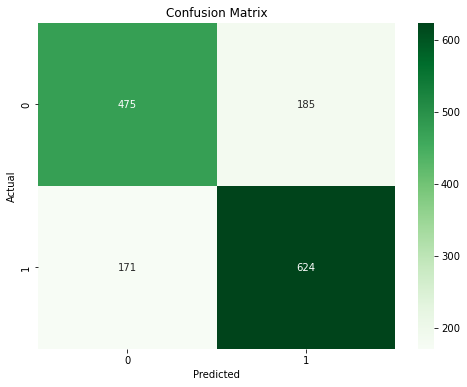

In [77]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_DT_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota Da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

Um modelo de regressão logística modela a relação entre as variáveis independentes e a probabilidade de pertencer a uma determinada classe usando uma função logística. No nosso contexto as variaveis independentes são as features utilizadas e, portanto estas variaveis independentes serão utilizadas para prever a probabilidade de uma droga pertencer a uma classe especifica. Este tipo de modelo também é adequado para problemas de classificação binária.

### Explorar os hiperparametros e determinar a melhor combinação


In [84]:
# Definir os hiperparâmetros 
parameters = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [10,100, 200]
}

# Criar o modelo de regressão logística
logistic_regression = LogisticRegression()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(logistic_regression, parameters, scoring='f1', cv=5)

# Executar a busca em grid para encontrar os melhores hiperparâmetros
grid_search.fit(X_tr[:, 3:], y_tr)

# Obter os melhores hiperparâmetros encontrados
best_params_LT = grid_search.best_params_
best_params_LT

c:\Users\guilh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\guilh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\guilh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\guilh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\guilh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\guilh\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the co

{'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}

### Treino do modelo LR com hiperparametros já definidos

In [86]:
LR_classifier = LogisticRegression(random_state=42, C=10, max_iter=100, penalty='l1', solver='liblinear')

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_LR_train, X_LR_test, y_LR_train, y_LR_test =  X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_LR_train_new = X_LR_train
    X_LR_train_new = min_max_scaler.fit_transform(X_LR_train_new)
    
    X_LR_test_new = X_LR_test
    X_LR_test_new = min_max_scaler.transform(X_LR_test_new)
    
    LR_classifier.fit(X_LR_train_new, y_LR_train)
    y_pred = LR_classifier.predict(X_LR_test_new)

### Avaliação do treino do modelo LR


In [87]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
LR_classifier.fit(X_new, y_tr)
y_tr_predict = LR_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)

f1 on Train set:  0.8124127230411171
MCC on Train set:  0.5798701311538832
tn, fp, tp, fn 1991 648 2618 561
Specificity on Train set(tn / (tn+fp)):  0.7544524441076165
Sensitivity on Train set(tp / (tp+fn)):  0.8235294117647058
Accuracy on Train set:  0.7921966311447233


### Teste do modelo LR já treinado e respetivas métricas


In [88]:
X_te_new = X_te[:,3:]
x_test_df = pd.DataFrame(X_te_new)

X_te_new = min_max_scaler.transform(X_te_new)
x_test_df = pd.DataFrame(X_te_new)

y_LR_pred = LR_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_LR_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_LR_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_LR_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.7979861548143486
MCC on Test set:  0.5549891711440779
tn, fp, tp, fn 500 160 634 161
Specificity on Test set(tn / (tn+fp)):  0.7575757575757576
Sensitivity on Test set(tp / (tp+fn)):  0.7974842767295598
Accuracy on Test set:  0.7793814432989691
Precision on Test set:  0.7984886649874056


### Confusion Matrix resultante do teste do modelo LR

Confusion Matrix:
[[500 160]
 [161 634]]


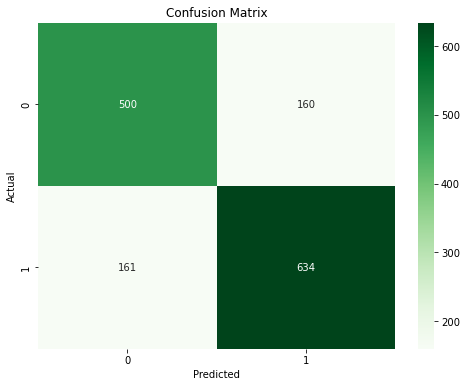

In [89]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_LR_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# k-Nearest Neighbors

É um algoritmo de ML que também pode ser utilizado para classificação e regressão. É baseado no princípio de que os pontos semelhantes tendem a estar próximos uns dos outros num determinado espaço de características. No k-NN, o valor de k representa o número de vizinhos mais próximos que são considerados para tomar uma decisão de classificação (no nosso caso). Para classificação, o k-NN atribui a classe mais frequente entre os k vizinhos mais próximos aos  dados a serem classificados. 

### Explorar os hiperparametros e determinar a melhor combinação

In [68]:
# Definir os hiperparâmetros
parameters = {
    'n_neighbors': [2,3, 5, 7,10,20,100],
    'weights': ['uniform', 'distance'],

}

# Criar o modelo k-NN
knn = KNeighborsClassifier()

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(knn, parameters, scoring='f1', cv=5)

# Executar a busca em grid para encontrar os melhores hiperparâmetros
grid_search.fit(X_tr[:, 3:], y_tr)

# Obter os melhores hiperparâmetros encontrados
best_params_KNN = grid_search.best_params_
best_params_KNN


{'n_neighbors': 20, 'weights': 'distance'}

### Treino do modelo KNN com hiperparametros já definidos

In [70]:
KN_classifier = KNeighborsClassifier(n_neighbors=20,weights="distance")

for train_index, test_index in sss.split(X_tr, y_tr):
    positive = 0
    negative = 0
    for i in range(y_tr.shape[0]):
        if y_tr[i] == 1:
            positive += 1
        else:
            negative += 1
    
    X_KN_train, X_KN_test, y_KN_train, y_KN_test =  X_tr[train_index,3:], X_tr[test_index,3:], y_tr[train_index], y_tr[test_index]
    
    X_KN_train_new = X_KN_train
    X_KN_train_new = min_max_scaler.fit_transform(X_KN_train_new)
    
    X_KN_test_new = X_KN_test
    X_KN_test_new = min_max_scaler.transform(X_KN_test_new)
    
    KN_classifier.fit(X_KN_train_new, y_KN_train)
    y_pred = KN_classifier.predict(X_KN_test_new)

### Avaliação do treino do modelo KNN


In [71]:
X_new = X_tr[:,3:]
X_new = min_max_scaler.fit_transform(X_new)
KN_classifier.fit(X_new, y_tr)
y_tr_predict = KN_classifier.predict(X_new)
print('f1 on Train set: ', f1_score(y_tr, y_tr_predict))
print('MCC on Train set: ', matthews_corrcoef(y_tr, y_tr_predict))

tn, fp, fn, tp = confusion_matrix(y_tr, y_tr_predict).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Train set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Train set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Train set: ', accuracy)

f1 on Train set:  1.0
MCC on Train set:  1.0
tn, fp, tp, fn 2639 0 3179 0
Specificity on Train set(tn / (tn+fp)):  1.0
Sensitivity on Train set(tp / (tp+fn)):  1.0
Accuracy on Train set:  1.0


### Teste do modelo KNN já treinado e respetivas métricas


In [75]:
X_te_new = X_te[:,3:]

X_te_new = min_max_scaler.transform(X_te_new)

y_KN_pred = KN_classifier.predict(X_te_new)

print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_KN_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_KN_pred))
tn, fp, fn, tp = confusion_matrix(y_te, y_KN_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.8207317073170732
MCC on Test set:  0.5911688844772861
tn, fp, tp, fn 488 172 673 122
Specificity on Test set(tn / (tn+fp)):  0.7393939393939394
Sensitivity on Test set(tp / (tp+fn)):  0.8465408805031447
Accuracy on Test set:  0.797938144329897
Precision on Test set:  0.7964497041420119


### Confusion Matrix resultante do teste do modelo KNN

Confusion Matrix:
[[488 172]
 [122 673]]


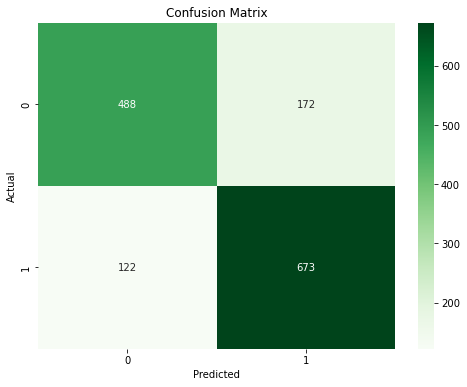

In [78]:
# Calcula a matriz de confusão
confusion = confusion_matrix(y_te, y_KN_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Deep Learning- Neural Networks

As redes neuronais são compostas por camadas de nós, contendo uma camada de entrada, uma ou mais camadas ocultas (intermédias) e uma camada de saída. Cada nó liga-se a outro e tem um peso e limite associados. Se a saída de um nó individual estiver acima do valor limite especificado, esse nó é ativado, enviando dados para a próxima camada da rede. Caso contrário, nenhum dado é trasmitido para a próxima camada da rede.

### Explorar os hiperparametros e determinar a melhor combinação

In [79]:
# Definir os hiperparâmetros 
param_grid = {
    'units': [32, 64, 128],  # Número de unidades nas camadas ocultas
    'activation': ['relu', 'sigmoid'],  # Função de ativação
    'optimizer': ['adam', 'sgd'],  # Otimizador
    'epochs': [10, 20, 30],  # Número de épocas de treinamento
    'batch_size': [32, 64]  # Tamanho do lote
}

# Criar o modelo
def create_model(units, activation, optimizer):
    model = keras.Sequential([
        layers.Dense(units, activation=activation),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Criar o objeto GridSearchCV
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)
X_tr_test = X_tr[:,3:].astype(float)
X_te_test = X_te[:,3:].astype(float)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=sss,  # Usar validação cruzada em 10 partes
    scoring='accuracy'
)

# Realizar a busca
grid_result = grid_search.fit(X_tr_test, y_tr)

# Melhores hiperparâmetros encontrados
best_params = grid_result.best_params_
best_params

C:\Users\guilh\AppData\Local\Temp\ipykernel_17732\78732511.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)


Epoch 1/10
164/164 [==============================] - 2s 1ms/step - loss: 50784616.0000 - accuracy: 0.5252
Epoch 2/10
164/164 [==============================] - 0s 1ms/step - loss: 6358363.0000 - accuracy: 0.5311
Epoch 3/10
164/164 [==============================] - 0s 2ms/step - loss: 8867393.0000 - accuracy: 0.5160
Epoch 4/10
164/164 [==============================] - 0s 1ms/step - loss: 16566178.0000 - accuracy: 0.5369
Epoch 5/10
164/164 [==============================] - 0s 2ms/step - loss: 6435167.5000 - accuracy: 0.5332
Epoch 6/10
164/164 [==============================] - 0s 2ms/step - loss: 21597222.0000 - accuracy: 0.5367
Epoch 7/10
164/164 [==============================] - 0s 2ms/step - loss: 20254758.0000 - accuracy: 0.5672
Epoch 8/10
164/164 [==============================] - 0s 2ms/step - loss: 18929006.0000 - accuracy: 0.5896
Epoch 9/10
164/164 [==============================] - 0s 1ms/step - loss: 13217482.0000 - accuracy: 0.5676
Epoch 10/10
19/19 [=====================

{'activation': 'sigmoid',
 'batch_size': 64,
 'epochs': 30,
 'optimizer': 'adam',
 'units': 128}

### Treino do modelo NN com hiperparametros já definidos


In [80]:
# Treinar o modelo com os melhores hiperparâmetros
best_model = create_model(best_params['units'], best_params['activation'], best_params['optimizer'])
best_model.fit(X_tr_test, y_tr, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

Epoch 1/30
91/91 [==============================] - 1s 2ms/step - loss: 0.6741 - accuracy: 0.5911
Epoch 2/30
91/91 [==============================] - 0s 2ms/step - loss: 0.6542 - accuracy: 0.6177
Epoch 3/30
91/91 [==============================] - 0s 2ms/step - loss: 0.6417 - accuracy: 0.6323
Epoch 4/30
91/91 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.6351
Epoch 5/30
91/91 [==============================] - 0s 2ms/step - loss: 0.6227 - accuracy: 0.6514
Epoch 6/30
91/91 [==============================] - 0s 2ms/step - loss: 0.6142 - accuracy: 0.6619
Epoch 7/30
91/91 [==============================] - 0s 2ms/step - loss: 0.6074 - accuracy: 0.6557
Epoch 8/30
91/91 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.6647
Epoch 9/30
91/91 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.6660
Epoch 10/30
91/91 [==============================] - 0s 2ms/step - loss: 0.5963 - accuracy: 0.6700
Epoch 11/30
91/91 [

### Teste do modelo NN já treinado e respetivas métricas

In [81]:
# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_te_test)

y_pred = (y_pred > 0.5).astype(int)  # Converter as previsões em valores binários (0 ou 1)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_te, y_pred)
tn, fp, fn, tp = confusion.ravel()

# Calcular 
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Imprimir a matriz de confusão
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_pred)) 
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

46/46 [==============================] - 0s 1ms/step
*************************************
f1 on Test set:  0.7570912841670965
MCC on Test set:  0.3668201013849652
tn, fp, tp, fn 250 410 734 61
Specificity on Test set(tn / (tn+fp)):  0.3787878787878788
Sensitivity on Test set(tp / (tp+fn)):  0.9232704402515723
Accuracy on Test set:  0.6762886597938145
Precision on Test set:  0.6416083916083916


### Confusion Matrix resultante do teste do modelo NN

Confusion Matrix:
[[250 410]
 [ 61 734]]


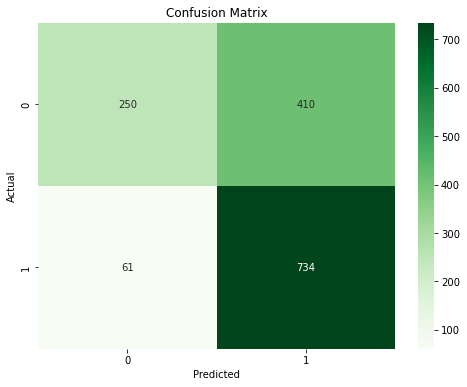

In [82]:

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [83]:
# Definir os hiperparâmetros 
param_grid = {
    'units': [32, 64, 128],  # Número de unidades nas camadas ocultas
    'activation': ['relu', 'sigmoid'],  # Função de ativação
    'optimizer': ['adam', 'sgd'],  # Otimizador
    'epochs': [10, 20, 30],  # Número de épocas de treinamento
    'batch_size': [32, 64]  # Tamanho do lote
}

# Criar o modelo
def create_model(units, activation, optimizer):
    model = keras.Sequential([
        layers.Dense(units, activation=activation),
        layers.Dense(units, activation=activation),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Criar o objeto GridSearchCV
model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)
X_tr_test = X_tr[:,3:].astype(float)
X_te_test = X_te[:,3:].astype(float)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=sss,  # Usar validação cruzada em 10 partes
    scoring='accuracy'
)

# Realizar a busca
grid_result = grid_search.fit(X_tr_test, y_tr)

# Melhores hiperparâmetros encontrados
best_params = grid_result.best_params_
best_params

Epoch 1/10


C:\Users\guilh\AppData\Local\Temp\ipykernel_17732\2400056695.py:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model)


164/164 [==============================] - 1s 2ms/step - loss: 27923596.0000 - accuracy: 0.5504
Epoch 2/10
164/164 [==============================] - 0s 2ms/step - loss: 6916678.0000 - accuracy: 0.5235
Epoch 3/10
164/164 [==============================] - 0s 2ms/step - loss: 12129185.0000 - accuracy: 0.5361
Epoch 4/10
164/164 [==============================] - 0s 2ms/step - loss: 11738716.0000 - accuracy: 0.5468
Epoch 5/10
164/164 [==============================] - 0s 2ms/step - loss: 14520872.0000 - accuracy: 0.5185
Epoch 6/10
164/164 [==============================] - 0s 2ms/step - loss: 5466646.5000 - accuracy: 0.5794
Epoch 7/10
164/164 [==============================] - 0s 2ms/step - loss: 6266079.0000 - accuracy: 0.5838
Epoch 8/10
164/164 [==============================] - 0s 2ms/step - loss: 6480119.0000 - accuracy: 0.5976
Epoch 9/10
164/164 [==============================] - 0s 2ms/step - loss: 4612964.5000 - accuracy: 0.5772
Epoch 10/10
19/19 [==============================] - 

{'activation': 'sigmoid',
 'batch_size': 64,
 'epochs': 30,
 'optimizer': 'adam',
 'units': 128}

In [84]:
# Treinar o modelo com os melhores hiperparâmetros
best_model = create_model(best_params['units'], best_params['activation'], best_params['optimizer'])
best_model.fit(X_tr_test, y_tr, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

Epoch 1/30
91/91 [==============================] - 1s 3ms/step - loss: 0.6806 - accuracy: 0.5739
Epoch 2/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6616 - accuracy: 0.6160
Epoch 3/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6436 - accuracy: 0.6337
Epoch 4/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6376 - accuracy: 0.6399
Epoch 5/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.6404
Epoch 6/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6183 - accuracy: 0.6430
Epoch 7/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6158 - accuracy: 0.6581
Epoch 8/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6135 - accuracy: 0.6509
Epoch 9/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6127 - accuracy: 0.6525
Epoch 10/30
91/91 [==============================] - 0s 3ms/step - loss: 0.6038 - accuracy: 0.6593
Epoch 11/30
91/91 [

In [85]:
# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_te_test)

y_pred = (y_pred > 0.5).astype(int)  # Converter as previsões em valores binários (0 ou 1)

# Calcular a matriz de confusão
confusion = confusion_matrix(y_te, y_pred)
tn, fp, fn, tp = confusion.ravel()

# Calcular 
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Imprimir a matriz de confusão
print("*************************************")
print('f1 on Test set: ', f1_score(y_te, y_pred))
print('MCC on Test set: ', matthews_corrcoef(y_te, y_pred)) 
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn + fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp + fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

46/46 [==============================] - 0s 1ms/step
*************************************
f1 on Test set:  0.7566165023352361
MCC on Test set:  0.3670155651349436
tn, fp, tp, fn 257 403 729 66
Specificity on Test set(tn / (tn+fp)):  0.3893939393939394
Sensitivity on Test set(tp / (tp+fn)):  0.9169811320754717
Accuracy on Test set:  0.6776632302405499
Precision on Test set:  0.6439929328621908


Confusion Matrix:
[[257 403]
 [ 66 729]]


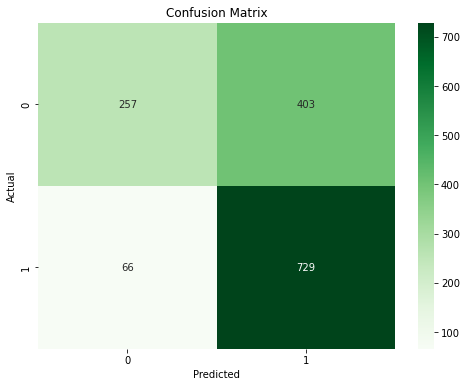

In [86]:
# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plota a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Interpretação global

Decidimos colocar todas as métricas avaliadas num dataframe, de modo a ser mais fácil visualizar qual o melhor modelo. Além disso ordenamos pelos valores apresentados, em primeiro lugar, na accuracy e, caso existisse um empate, o segundo critério seria o valor da precisão.

In [113]:
# Abrir o arquivo CSV e ler os dados em um DataFrame
df_metricas = pd.read_csv('metricas.csv',sep=';',keep_default_na=False)
# Organizar o DataFrame com base nos valores da coluna 'accuracy' em ordem decrescente
df_metricas = df_metricas.sort_values(by=['Accuracy','Precision'], ascending=False)


# Imprimir o DataFrame organizado
df_metricas

#melhor modelo é RF

ML models  F1-score    MCC  Accuracy  Specificity  Sensitivity  \
1              RF     0.850  0.672     0.837        0.830        0.842   
5             KNN     0.821  0.591     0.798        0.739        0.847   
0             SVM     0.818  0.594     0.791        0.773        0.806   
4              LR     0.780  0.555     0.779        0.758        0.797   
3              DT     0.778  0.506     0.755        0.720        0.785   
6  NN (2 camadas)     0.745  0.345     0.673        0.427        0.877   
7  NN (3 camadas)     0.733  0.304     0.654        0.397        0.868   
2              NB     0.730  0.254     0.622        0.243        0.937   

   Precision  
1      0.857  
5      0.796  
0      0.810  
4      0.798  
3      0.771  
6      0.648  
7      0.634  
2      0.598

Em suma, podemos concluir que das 8 abordagens efectuadas, o modelo de ML que apresenta maiores valores nas métricas analisadas é o __Random Forest__. Assim, daqui em diante decidimos utilizar este modelo como referência. 

# Escolha das features mais importantes para o melhor modelo selecionado (RF)

Tendo em conta o modelo selecionado anteriormente, ou seja, Random Forest com os hiperprametros max_depth: None, min_samples_split: 5 e n_estimators: 1000 decidimos avaliar a importancia de cada feature selecionada. Relembrando apenas que o número total de features é 208, e algumas já foram analisadas com mais detalhe anteriormente.


__nota__: o nosso dataset tem 3 colunas associadas aos metadados, por isso, daqui em diante, todos os índices obtidos correspondem na verdade a 'indice resultante+3'.

Vamos usar o importances do sktlearn!

A importância das características é uma medida que indica o quanto cada característica contribui para a capacidade do modelo de fazer previsões precisas. Ela pode ser usada para identificar as características mais influentes ou para selecionar um subconjunto das características mais relevantes. No caso de RF, atribui-se uma pontuação a cada característica com base na sua contribuição para a redução do erro nas previsões feitas pelo modelo. Quanto maior a importância, mais influente é a característica para o modelo.

In [92]:
# avaliar a importancia
importances = RF_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
top_importancias=[]
top_variaveis=[]

# Imprimir as variáveis mais importantes
for i, index in enumerate(indices):
    top_importancias.append(importances[index])
    top_variaveis.append(index)
    print(f"{i + 1}. Variável {index}: {importances[index]}")

1. Variável 79: 0.02031240799427652
2. Variável 24: 0.01781183311848987
3. Variável 39: 0.01756668229566914
4. Variável 64: 0.015042807517609514
5. Variável 17: 0.01497535301859622
6. Variável 97: 0.014155675943254852
7. Variável 66: 0.013436210782256007
8. Variável 1: 0.013365994710234027
9. Variável 4: 0.013202037811752897
10. Variável 43: 0.012869209937744685
11. Variável 12: 0.012757058939494047
12. Variável 23: 0.012635351634109114
13. Variável 11: 0.01232856803679165
14. Variável 13: 0.012064321758376424
15. Variável 10: 0.011899904284471657
16. Variável 22: 0.01159220988282619
17. Variável 76: 0.011332096124763814
18. Variável 19: 0.011191222828384844
19. Variável 26: 0.011149662934627129
20. Variável 25: 0.010994033285113952
21. Variável 60: 0.010874104575508654
22. Variável 20: 0.01083174680814593
23. Variável 18: 0.010782179125471815
24. Variável 2: 0.010582100859790063
25. Variável 121: 0.01054315814779624
26. Variável 77: 0.010525683013694003
27. Variável 51: 0.010518629923

In [105]:
features_menos_importantes=[]
nomes_coluna=df_final.columns.tolist()
indices=[70,198,83]
for index in indices:
    nome_coluna=nomes_coluna[index]
    features_menos_importantes.append(nome_coluna)
features_menos_importantes

['SMR_VSA8', 'fr_prisulfonamd', 'SlogP_VSA9']

In [110]:
features_mais_importantes=[]
nomes_coluna=df_final.columns.tolist()
indices=[82,27,42]
for index in indices:
    nome_coluna=nomes_coluna[index]
    features_mais_importantes.append(nome_coluna)
features_mais_importantes

['SlogP_VSA8', 'BCUT2D_MRLOW', 'HallKierAlpha']

Face aos resultados obtidos decidimos explorar as 3 variaveis mais e menos "importantes".

Relativamente à análise das colunas menos importantes, o resultado obtido era algo que já estavamos à espera tendo em conta a análise anterior. Isto porque, estas features apenas apresentam valor de 0 e, como não têm nenhuma variancia em termos de valor é lógico que não iriam contribuir em nada para a capacidade preditiva deste modelo ou de qualquer outro. Sendo que o mais adequado até poderia ser numa fase anterior à remoção destas colunas.

Relativamente à análise das features mais importantes, é possivel verificar que a feature 'SlogP_VSA8' e 'HallKierAlpha' aqui mencionadas já foram selecionadas na nossa análise anterior quando filtramos um top features que eram mais difereniadas. Assim, numa primeira análise podemos verificar um certa semelhança na importancia das features mesmo com o modelo de ML selecionado.

A feature "BCUT2D_MRLOW" é um descritor molecular chamado "Burden Connectivity Indices of 2D Molecular Representation - MRLOW" . Esta feature é calculada a partir da representação molecular de compostos químicos e avalia a distribuição e as interações de átomos vizinhos na estrutura molecular. Este descritor é fundamental  nas análises QSAR, que por sua vez, é usado para a previsão do potencial mutagénico de fármacos, entre outras propriedades.

A feature HallKierAlpha (Hall-Kier Alpha Shape Index) é uma medida que descreve a forma tridimensional de uma molécula. Ela é baseada na teoria dos campos de Gauss e calcula a distribuição espacial dos eletrões de uma molécula. Esta característica também pode ser útil em estudos de relações estrutura-atividade (QSAR) e modelagem molecular, permitindo a análise das propriedades e atividades dos compostos com base na forma tridimensional.
 

In [91]:
#top_variaveis
lista=[]
c=0
soma=0
for x in top_importancias:
    soma=soma+x
    c+=1
    if (soma)>=0.9:
        break
print((c,soma))


(106, 0.9021573838434064)


Decidimos também verificar quantas features seriam necessárias para obter uma soma de importancias de 0.9. O valor obtido foi de 106 features, ou seja, até poderiamos extrapolar e pensar que apenas estas 106 features seriam suficientes para ter informação suficiente para ter um modelo de RF capaz de prever a capacidade mutagénica de uma droga. Todavia, isso depende dos valores que pretendemos obter em cada métrica, porque se por ventura diminuisse o dataset para esse numero de features poderiamos tambem baixar a capacidade preditiva do modelo. Ou seja, ganhavamos em tempo de processamento mas diminuíamos a sua capacidade preditiva e portanto era algo que teriamos de avaliar melhor.

# Testar o modelo RF com datasets dos outros grupos

Uma análise extra que nós quisemos fazer foi testar se o modelo selecionado como o melhor, com os mesmos hiperparametros se iria comportar de forma semelhante em dados que dispunham do mesmo conjunto de features.
Para isso análisamos o modelo em questão nos seguintes datasets ( __cyp2c9__ e __cyp2c19__) com o intuito de observar se o modelo conseguiria prever se :
uma determinada droga consegue ou não ter capacidade inibitória das enzimas em questão, que desempenham um papel crucial no metabolismo de diversos fármaco. O que iria influenciar a velocidade com que certos medicamentos sao metabolizados e ter consequencias para a saúde.


Assim, apenas importamos os ficheiros correspondentes, colocamos os metadados e dados num dataframe único e repetimos a mesma aboradagem de trabalho com a particularidade de que o modelo RF, com hiperparametros max_depth: None, min_samples_split: 5 e n_estimators: 1000, ser apenas testado e não treinado para realmente avaliar a sua capacidade preditiva digamos "global".

### cyp2c9

In [114]:
df_cyp2c9 = pd.read_csv('cyp2c9.csv') #meta
df_cyp2c9_features= pd.read_csv('cyp2c9_features.csv') #dados features
df_global_cyp2c9= pd.concat([df_cyp2c9, df_cyp2c9_features], axis=1)
df_global_cyp2c9

ids                                             smiles  Y  \
0       1960010.0       CCN1C(=O)/C(=C2\SC(=S)N(CCCOC)C2=O)c2ccccc21  1   
1        644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1   
2        644890.0    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1  1   
3        644968.0               COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1  1   
4        645164.0  CCC(c1nnnn1CC1CCCO1)N(CCN1CCOCC1)Cc1cc2cc(C)cc...  0   
...           ...                                                ... ..   
11929  16758814.0  CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...  0   
11930  16758815.0           C=CC1=C[C@@H](O)[C@@H]2O[C@@H]2C12OCCCO2  0   
11931  16758816.0  O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...  0   
11932  16758818.0  C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...  0   
11933  10847630.0                        COC(=O)NC/C=C\c1nc(CCCO)co1  0   

       MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0           12.820479       -0.183140          12.820479           0.128619   
1            6.126257        0.660427           6.126257           0.660427   
2            5.719940       -0.219974           5.719940           0.075509   
3           12.040634       -0.208718          12.040634           0.006714   
4           13.082813       -0.044883          13.082813           0.018472   
...               ...             ...                ...                ...   
11929       12.346902       -0.801800          12.346902           0.024123   
11930        9.674588       -0.801690           9.674588           0.174259   
11931       13.390758       -1.019880          13.390758           0.162294   
11932       13.179767       -1.161112          13.179767           0.077392   
11933       10.715530       -0.480844          10.715530           0.139962   

            qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
0      0.457873  362.476         344.332  ...         1.0           0.0   
1      0.756902  255.708         245.628  ...         0.0           0.0   
2      0.605920  421.549         390.301  ...         0.0           0.0   
3      0.728361  324.344         308.216  ...         0.0           0.0   
4      0.457249  495.628         458.332  ...         0.0           0.0   
...         ...      ...             ...  ...         ...           ...   
11929  0.682518  263.293         246.157  ...         0.0           0.0   
11930  0.635371  210.229         196.117  ...         0.0           0.0   
11931  0.455270  397.427         374.243  ...         0.0           0.0   
11932  0.772281  357.406         334.222  ...         0.0           0.0   
11933  0.773508  240.259         224.131  ...         0.0           0.0   

       fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
0             0.0                0.0           0.0          0.0          0.0   
1             0.0                0.0           0.0          0.0          0.0   
2             0.0                0.0           1.0          0.0          0.0   
3             0.0                0.0           1.0          0.0          0.0   
4             0.0                0.0           1.0          0.0          0.0   
...           ...                ...           ...          ...          ...   
11929         0.0                0.0           0.0          0.0          0.0   
11930         0.0                0.0           0.0          0.0          0.0   
11931         0.0                0.0           0.0          0.0          0.0   
11932         0.0                0.0           0.0          0.0          0.0   
11933         0.0                0.0           0.0          0.0          0.0   

       fr_thiophene  fr_unbrch_alkane  fr_urea  
0               0.0               1.0      0.0  
1               0.0               0.0      0.0  
2               0.0               0.0      0.0  
3               0.0               0.0      0.0  
4               0.0               0.0      0.0  
...     

In [115]:
df_global_cyp2c9.isnull().sum()


ids                 0
smiles              0
Y                   0
MaxEStateIndex      0
MinEStateIndex      0
                   ..
fr_thiazole         0
fr_thiocyan         0
fr_thiophene        0
fr_unbrch_alkane    0
fr_urea             0
Length: 211, dtype: int64

In [117]:
# X, i.e. the features or attributes
characters=df_global_cyp2c9.to_numpy()
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df_global_cyp2c9['Y'].to_numpy()
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

In [118]:
X_te_new = X[:,3:]
X_te_new = min_max_scaler.transform(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)
print("*************************************")
print('f1 on Test set: ', f1_score(Y, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(Y, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(Y, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.24110610532856916
MCC on Test set:  -0.016550537278323223
tn, fp, tp, fn 6273 1636 776 3249
Specificity on Test set(tn / (tn+fp)):  0.7931470476672146
Sensitivity on Test set(tp / (tp+fn)):  0.19279503105590062
Accuracy on Test set:  0.5906653259594437
Precision on Test set:  0.32172470978441126


Confusion Matrix:
[[6273 1636]
 [3249  776]]


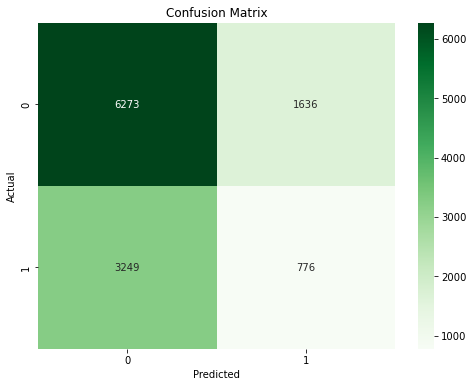

In [119]:
# Calcula a matriz de confusão
confusion = confusion_matrix(Y, y_RF_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### cyp2c19

In [120]:
df_cyp2c19 = pd.read_csv('cyp2c19.csv') #meta
df_cyp2c19_features= pd.read_csv('cyp2c19_features.csv') #dados features
df_global_cyp2c19= pd.concat([df_cyp2c19, df_cyp2c19_features], axis=1)
df_global_cyp2c19

ids                                             smiles  Y  \
0       6602638.0             CCCC(=O)Nc1ccc(N2CCN(CC)CC2)c(Cl)c1.Cl  0   
1        644675.0         CC(=O)N(c1ccc2oc(=O)sc2c1)S(=O)(=O)c1cccs1  1   
2        644851.0                   Clc1ccccc1-c1nc(-c2ccccc2)n[nH]1  1   
3        644890.0    COc1ccccc1C(c1nnnn1C(C)(C)C)N1CCN(Cc2ccncc2)CC1  1   
4        644968.0               COc1ccccc1CNC(=O)Cn1nnc(-c2ccncc2)n1  1   
...           ...                                                ... ..   
12508  16758814.0  CCN1C(=O)[C@@H]2[C@@H](CC[C@@H]3C(=O)C=C[C@@H]...  0   
12509  16758816.0  O=C1[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@H]4C3...  0   
12510  16758817.0  CCN1C(=O)[C@H]2CC=C3[C@@H]([C@H](O)[C@H]4O[C@@...  1   
12511  16758818.0  C[C@H](c1ccccc1)N1C(=O)[C@@H]2[C@@H](CC[C@@H]3...  0   
12512  10847630.0                        COC(=O)NC/C=C\c1nc(CCCO)co1  0   

       MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0           11.609395        0.000000          11.609395           0.000000   
1           12.610409       -3.973681          12.610409           0.072387   
2            6.126257        0.660427           6.126257           0.660427   
3            5.719940       -0.219974           5.719940           0.075509   
4           12.040634       -0.208718          12.040634           0.006714   
...               ...             ...                ...                ...   
12508       12.346902       -0.801800          12.346902           0.024123   
12509       13.390758       -1.019880          13.390758           0.162294   
12510       12.817440       -0.985371          12.817440           0.131139   
12511       13.179767       -1.161112          13.179767           0.077392   
12512       10.715530       -0.480844          10.715530           0.139962   

            qed    MolWt  HeavyAtomMolWt  ...  fr_sulfide  fr_sulfonamd  \
0      0.884168  346.302         321.102  ...         0.0           0.0   
1      0.720978  355.418         346.346  ...         0.0           1.0   
2      0.756902  255.708         245.628  ...         0.0           0.0   
3      0.605920  421.549         390.301  ...         0.0           0.0   
4      0.728361  324.344         308.216  ...         0.0           0.0   
...         ...      ...             ...  ...         ...           ...   
12508  0.682518  263.293         246.157  ...         0.0           0.0   
12509  0.455270  397.427         374.243  ...         0.0           0.0   
12510  0.406549  335.356         314.188  ...         0.0           0.0   
12511  0.772281  357.406         334.222  ...         0.0           0.0   
12512  0.773508  240.259         224.131  ...         0.0           0.0   

       fr_sulfone  fr_term_acetylene  fr_tetrazole  fr_thiazole  fr_thiocyan  \
0             0.0                0.0           0.0          0.0          0.0   
1             0.0                0.0           0.0          0.0          0.0   
2             0.0                0.0           0.0          0.0          0.0   
3             0.0                0.0           1.0          0.0          0.0   
4             0.0                0.0           1.0          0.0          0.0   
...           ...                ...           ...          ...          ...   
12508         0.0                0.0           0.0          0.0          0.0   
12509         0.0                0.0           0.0          0.0          0.0   
12510         0.0                0.0           0.0          0.0          0.0   
12511         0.0                0.0           0.0          0.0          0.0   
12512         0.0                0.0           0.0          0.0          0.0   

       fr_thiophene  fr_unbrch_alkane  fr_urea  
0               0.0               0.0      0.0  
1               1.0               0.0      0.0  
2               0.0               0.0      0.0  
3               0.0               0.0      0.0  
4               0.0               0.0      0.0  
...     

In [121]:
# X, i.e. the features or attributes
characters=df_global_cyp2c19.to_numpy()
# y, i.e. the class attribute where 0=negative and 1=positive
type_label=df_global_cyp2c19['Y'].to_numpy()
#common mapping
X=characters #rest of data
Y=type_label #0 or 1

In [122]:
X_te_new = X[:,3:]
X_te_new = min_max_scaler.transform(X_te_new)
y_RF_pred=RF_classifier.predict(X_te_new)
print("*************************************")
print('f1 on Test set: ', f1_score(Y, y_RF_pred))
print('MCC on Test set: ', matthews_corrcoef(Y, y_RF_pred))
tn, fp, fn, tp = confusion_matrix(Y, y_RF_pred).ravel()
print("tn, fp, tp, fn", tn, fp, tp, fn)
specificity = tn / (tn+fp)
print('Specificity on Test set(tn / (tn+fp)): ', specificity)
sensitivity = tp / (tp+fn)
print('Sensitivity on Test set(tp / (tp+fn)): ', sensitivity)
accuracy = (tp+tn) /(tp+tn+fp+fn)
print('Accuracy on Test set: ', accuracy)
precision=tp/(tp+fp)
print("Precision on Test set: ", precision)

*************************************
f1 on Test set:  0.3262596324836989
MCC on Test set:  0.06120914196081685
tn, fp, tp, fn 5454 1255 1376 4428
Specificity on Test set(tn / (tn+fp)):  0.8129378446862423
Sensitivity on Test set(tp / (tp+fn)):  0.2370778773259821
Accuracy on Test set:  0.5458323343722529
Precision on Test set:  0.5229950589129608


Confusion Matrix:
[[5454 1255]
 [4428 1376]]


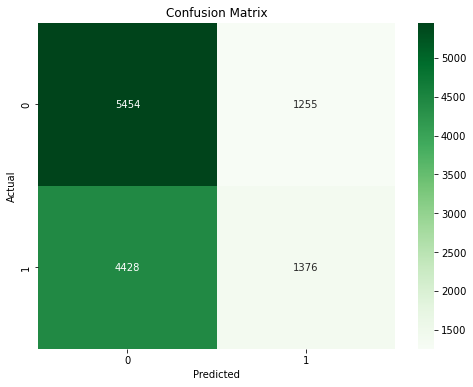

In [123]:
# Calcula a matriz de confusão
confusion = confusion_matrix(Y, y_RF_pred)

# Obtém os valores dos verdadeiros positivos (tp), verdadeiros negativos (tn),
# falsos positivos (fp) e falsos negativos (fn)
tn, fp, fn, tp = confusion.ravel()

# Imprime os valores da matriz de confusão
print("Confusion Matrix:")
print(confusion)

# Plot da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Interpretação desta abordagem extra

Apesar de os datasets analisados terem as mesmas features é facilmente observável que as métricas obtidos são, para ambos os casos, inferiores quando comparada com o mesmo modelo no dataset original (ames).
Em suma, podemos afirmar que o modelo selecionado tem uma capacidade preditiva adequada para o nosso dataset, mas para os datasets extra utilizados a sua capacidade já não é a ideal, não podendo por isso apresentar este modelo como solução de ML ótima para todos os datasets sugeridos pelo professor. Assim, a escolha do modelo deve ser feita consoante a problemática, que terá uma influencia caracteristica nos dados e, não propriamente por ter as mesmas features.

# Conclusão geral

Em suma, a análise realizada até então retrata a eventual dificuldade na previsão de uma determinada propriedade de um fármaco, neste caso em concreto a sua capacidade mutagénica. Isto é devido, essencialmente, ao facto de que apesar de existirem features (colunas) que têm uma maior preponderância, é a interação entre as diversas propriedades (colunas) que atribui ou não capacidade mutagénica. 

Com auxilio de modelos de ML e DL exploramos as suas capacidade preditivas através de um conjunto de dados para associar a capacidade mutagénica (Y=0 ou Y=1) de uma determinada droga. Das 8 abordagens diferentes, selecionamos o modelo de Random Forest com com hiperparametros max_depth: None, min_samples_split: 5 e n_estimators: 1000, pois foi aquele que apresentou melhores métricas, tendo por exemplo obtido valores de 0.837 de *accuracy* e 0.857 de precisão. Além disso, e depois de selecionar o modelo referido, vericou-se que as features 'SlogP_VSA8', 'BCUT2D_MRLOW' e 'HallKierAlpha' seriam aquelas com maior preponderação na resposta preditiva. Todavia, é importante realçar que estas eram insuficientes para conseguirmos ter uma abordagem preditiva global, sendo que para obter uma importância de 0.9 seriam necessárias 106 features.

Como extra testamos o modelo referido nos datasets destintos utilizados pelos outros grupos, chegando à conclusão de que a capacidade de previsão do mesmo era bastante inferior. Como trabalho futuro, poderia se testar este modelo RF num novo conjunto de drogas, que também fosse descrito pelas mesmas features em questão e estivesse associado ao teste de ames avaliando a capacidade mutagénica dos fármacos.


## Referências:

[1] Xu, Congying, et al. “In silico prediction of chemical Ames mutagenicity.” Journal of chemical information and modeling 52.11 (2012): 2840-2847.

[2] Smith, M. T. Advances in Understanding Benzene Health Effects and Susceptibility. Annu. Rev. Public Health, DOI: 10.1146/annurev.publhealth.012809.103646.


[3] Danishuddin, A. U. Khan. Descriptors and their selection methods in QSAR analysis: paradigm for drug design. Drug Discov. Today 2016, DOI: 10.1016/j.drudis.2016.06.013.


[4] Leo, A.; Hansch, C.; Elkins, D. Partition Coefficients and Their Uses. Chem. Rev. 1971, 71 (6), 525-616. DOI: 10.1021/cr60274a001.


[5] Hall, L. H.; Mohney, B.; Kier, L. B. The electrotopological state: An atom‐index for QSAR. Quant. Struct.-Act. Relat. 1991, 10 (2), 143-148. DOI: 10.1002/qsar.19910100108.


[6] Zámocký, M.; Koller, F. Hydrophobic and polar interactions of FDA-approved small molecule protein kinase inhibitors with their target enzymes. Pharmacol. Res. 2021, DOI: 10.1016/j.phrs.2021.105660.


[7] Sugimura, T.; Nagao, M.; Yahagi, T. Relationships between Electronegativity and Genotoxicity. Mutat. Res. Rev. Mutat. Res. 2000, 347 (1), 165-173. DOI: 10.1016/0027-5107(95)00011-7.



[8] Bickerton, G. R.; Paolini, G. V.; Besnard, J.; Muresan, S.; Hopkins, A. L. Quantifying the Chemical Beauty of Drugs. Nat. Chem. 2012, 4 (2), 90-98. DOI: 10.1038/nchem.1243.


[9] Laguionie-Marchais, C.; Allcock, A. L.; Baker, B. J.; Conneely, E.-A.; Dietrick, S. G.; Kearns, F. et al. Not Drug-like, but Like Drugs: Cnidaria Natural Products. Mar. Drugs 2022, 20, 42. DOI: 10.3390/md20010042.


[10] Hsu, K. H., Su, B. H., Tu, Y. S., Lin, O. A., & Tseng, Y. J. (2016). Mutagenicity in a Molecule: Identification of Core Structural Features of Mutagenicity Using a Scaffold Analysis. PLoS One, 11(2), e0148900. DOI:10.1371/journal.pone.0148900.